<a href="https://colab.research.google.com/github/pvanand07/Retail-Sales-Prediction-Regression/blob/master/Retail_Sales_Prediction_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Retail Sales Prediction - Regression



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### Submitted By - Anand Siva P V


# **Project Summary -**

# **GitHub Link -**

https://github.com/pvanand07/Retail-Sales-Prediction-Regression

# **Problem Statement**



### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### Load dataset from Google Drive and convert to dataframe

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Almabetter/Almabetter Projects/Data & Resources/Rossmann Stores Data.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Almabetter/Almabetter Projects/Data & Resources/store.csv')

In [5]:
print(df.shape)
df.head()

(1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
df2 = pd.read_csv('/content/drive/MyDrive/Almabetter/Almabetter Projects/Data & Resources/store.csv')
print(df2.shape)
df2.head()

(1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


 We have a fact table(df1) that contains the sales data for each store and date and a dimension table(df2) that contains each store information. We can merge the fact table with the dimension table for easier analysis.

In [7]:
df.set_index('Store', inplace=True)
df2.set_index('Store', inplace=True)
df_m = df.join(df2, on='Store')

### Dataset First View

In [8]:
# Dataset First Look
df_m.sample(5)

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,,,,,,,,,
57,3,2015-03-18,9546,884,1,1,0,0,d,c,420.0,6.0,2014.0,0,NaN,NaN,NaN
21,3,2013-10-02,4085,469,1,0,0,0,c,c,550.0,10.0,1999.0,1,45.0,2009.0,"Jan,Apr,Jul,Oct"
521,5,2013-04-26,5199,434,1,1,0,0,d,a,18610.0,11.0,2002.0,1,48.0,2011.0,"Mar,Jun,Sept,Dec"
478,4,2014-11-13,6634,673,1,1,0,0,d,c,1940.0,3.0,2012.0,0,NaN,NaN,NaN
923,6,2014-07-19,4315,533,1,0,0,0,a,a,280.0,9.0,2008.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
print(f'The dataset has {df_m.shape[0]} rows and {df_m.shape[1]} columns')

The dataset has 1017209 rows and 17 columns


### Dataset Information

In [10]:
# Dataset Info
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 1 to 1115
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   DayOfWeek                  1017209 non-null  int64  
 1   Date                       1017209 non-null  object 
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  object 
 9   Assortment                 1017209 non-null  object 
 10  CompetitionDistance        1014567 non-null  float64
 11  CompetitionOpenSinceMonth  693861 non-null   float64
 12  CompetitionOpenSinceYear   693861 non-null   float64
 13  Promo2         

### Data Cleaning

#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
print('The dataset has:',df_m.duplicated().sum(),'duplicate rows')

The dataset has: 595 duplicate rows


#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
missing_values = df_m.isna().sum().sort_values(ascending=False)
print('Features with missing values','Count\n')
missing_values[missing_values > 0]

Features with missing values Count



PromoInterval                508031
Promo2SinceYear              508031
Promo2SinceWeek              508031
CompetitionOpenSinceYear     323348
CompetitionOpenSinceMonth    323348
CompetitionDistance            2642
dtype: int64

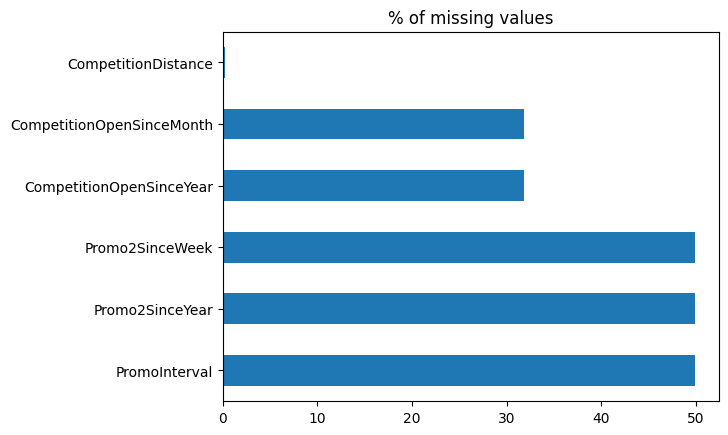

In [13]:
# Visualizing the % of missing values
(missing_values[missing_values > 0]*100/df_m.shape[0]).plot(kind='barh')
plt.title('% of missing values')
plt.show()

### What did you know about your dataset?

The dataset represents historical sales data for 1,115 Rossmann stores. The dataset contains 1,017,209 entries (rows) and 17 features (columns). The dataset contains 595 duplicate entries and 5 features with more than 30% missing values.

In [14]:
df_m.to_csv('df_m.csv')

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
df_m.columns.tolist()

['DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [16]:
# Dataset Describe
df_m.describe()

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


### Variables Description

The dataset includes the following features:

- **Id**: Represents a unique identifier for a combination of Store and Date within the test set.
- **Store**: A unique identifier for each store.
- **Sales**: The turnover (sales) for a given day, which is the target variable to be predicted.
- **Customers**: The number of customers on a given day.
- **Open**: An indicator of whether the store was open: 0 = closed, 1 = open.
- **StateHoliday**: Indicates a state holiday. Most stores are closed on state holidays, except for a few exceptions. The values are: a = public holiday, b = Easter holiday, c = Christmas, 0 = None.
- **SchoolHoliday**: Indicates whether the (Store, Date) was affected by the closure of public schools.
- **StoreType**: Differentiates between four different store models: a, b, c, d.
- **Assortment**: Describes the assortment level of the store: a = basic, b = extra, c = extended.
- **CompetitionDistance**: The distance in meters to the nearest competitor store.
- **CompetitionOpenSince[Month/Year]**: Provides an approximate year and month when the nearest competitor store was opened.
- **Promo**: Indicates whether a store is running a promotion on a given day.
- **Promo2**: Represents a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating.
- **Promo2Since[Year/Week]**: Describes the year and calendar week when the store started participating in Promo2.
- **PromoInterval**: Describes the consecutive intervals when Promo2 is started, specifying the months in which the promotion is started anew. For example, "Feb,May,Aug,Nov" means the promotion starts in February, May, August, and November of any given year for that store.

### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
df_m.nunique().sort_values(ascending=False)

Sales                        21734
Customers                     4086
Date                           942
CompetitionDistance            654
Promo2SinceWeek                 24
CompetitionOpenSinceYear        23
CompetitionOpenSinceMonth       12
DayOfWeek                        7
Promo2SinceYear                  7
StateHoliday                     5
StoreType                        4
Assortment                       3
PromoInterval                    3
SchoolHoliday                    2
Promo2                           2
Promo                            2
Open                             2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

#### lets drop the duplicate values previously found

In [18]:
df_m.drop_duplicates(inplace=True)

#### There are data points when the stores are 'closed'

In [19]:
# Checking value counts during 'open' and 'closed'
print(df_m['Open'].value_counts())

1    844392
0    172222
Name: Open, dtype: int64


In [20]:
# Checking sum of sales during 'open' and 'closed'
print(df_m[['Open','Sales']].groupby(['Open']).sum())

           Sales
Open            
0              0
1     5873180623


- Since there are no sales when the stores are 'closed' we can drop the values where store is 'closed'.
- We can drop the 'Open' column since it contains only 1 unique value.

In [21]:
# Selecting only the rows with Open = 1
df_m2 = df_m[df_m['Open'] == 1].drop('Open', axis=1).copy()

# Converting Date to Datetime for analysis and feature engineering
df_m2['Date'] = pd.to_datetime(df_m2['Date'])

# We can also convert object Dtype to category for reduced memory usage
for col in df_m2.select_dtypes('object').columns:
  df_m2[col] = df_m2[col].astype('category')

In [22]:
df_m2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 1 to 1097
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   DayOfWeek                  844392 non-null  int64         
 1   Date                       844392 non-null  datetime64[ns]
 2   Sales                      844392 non-null  int64         
 3   Customers                  844392 non-null  int64         
 4   Promo                      844392 non-null  int64         
 5   StateHoliday               844392 non-null  category      
 6   SchoolHoliday              844392 non-null  int64         
 7   StoreType                  844392 non-null  category      
 8   Assortment                 844392 non-null  category      
 9   CompetitionDistance        842206 non-null  float64       
 10  CompetitionOpenSinceMonth  575773 non-null  float64       
 11  CompetitionOpenSinceYear   575773 non-null  float64   

In [23]:
#checking number of unique values in each categorical column
[df_m2[col].value_counts() for col in df_m2.select_dtypes('category').columns]

[0    731342
 0    112140
 a       694
 b       145
 c        71
 Name: StateHoliday, dtype: int64,
 a    457077
 d    258774
 c    112978
 b     15563
 Name: StoreType, dtype: int64,
 a    444909
 c    391271
 b      8212
 Name: Assortment, dtype: int64,
 Jan,Apr,Jul,Oct     242411
 Feb,May,Aug,Nov      98005
 Mar,Jun,Sept,Dec     80669
 Name: PromoInterval, dtype: int64]

In [24]:
# Checking unique values in 'StateHoliday'
print(df_m2['StateHoliday'].unique())

['0', 'a', 'b', 'c', 0]
Categories (5, object): [0, '0', 'a', 'b', 'c']


The 'StateHoliday' column contains a mix of integer and string representations of the "0" value. This can cause the value counts to show duplicates.

In [25]:
# Replace all variations of "0" with a single representation
df_m2['StateHoliday'] = df_m2['StateHoliday'].replace(['0', 0], '0')

### What all manipulations have you done and insights you found?

- The dataset contains a mix of categorical and numerical columns.
-  The sum of sales for closed stores are zero Hence selecting only the rows with Open = 1.
- Dropped the 'Open' column since it contains only one unique value (1 for open stores).
- Converted the 'Date' column to datetime data type for analysis and feature engineering purposes.
- The 'StateHoliday' column has a mix of integer and string representations of the "0" value, which has been resolved by replacing all variations of "0" with str(0).

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [26]:
df_m.columns

Index(['DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

#### Helper functions for cleaning up the data (Helps better visualize the data)

In [27]:
def cap_outliers(df):
    # Create a copy of the DataFrame to avoid modifying the original data
    cleaned_df = df.copy()

    # Iterate over numerical columns
    for column in cleaned_df.select_dtypes(include=np.number):
        # Calculate the 99th percentile value
        upper_cap_value = cleaned_df[column].quantile(0.95)
        lower_cap_value = cleaned_df[column].quantile(0.05)

        # Cap outliers to the 99th percentile value
        cleaned_df[column] = np.where(cleaned_df[column] > upper_cap_value, upper_cap_value, cleaned_df[column])
        cleaned_df[column] = np.where(cleaned_df[column] < lower_cap_value, lower_cap_value, cleaned_df[column])

    return cleaned_df

### Test Visuals

###
# Handle missing values
data = df_m2.dropna()

# Handle duplicates
data.drop_duplicates(inplace=True)

# 1. Histogram
plt.hist(data['Sales'])
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Sales')
plt.show()

# 2. Bar Plot
sns.barplot(x='DayOfWeek', y='Sales', data=data)
plt.xlabel('Day of Week')
plt.ylabel('Sales')
plt.title('Sales by Day of Week')
plt.show()

# 3. Scatter Plot
plt.scatter(data['Customers'], data['Sales'])
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.title('Sales vs Customers')
plt.show()

# 4. Box Plot
sns.boxplot(x='StateHoliday', y='Sales', data=data)
plt.xlabel('State Holiday')
plt.ylabel('Sales')
plt.title('Sales during State Holidays')
plt.show()

# 5. Violin Plot
sns.violinplot(x='Assortment', y='Sales', data=data)
plt.xlabel('Assortment')
plt.ylabel('Sales')
plt.title('Sales by Assortment Level')
plt.show()

# 6. Box Plot
sns.boxplot(x='StoreType', y='Customers', data=data)
plt.xlabel('Store Type')
plt.ylabel('Customers')
plt.title('Customers by Store Type')
plt.show()

# 7. Violin Plot
sns.violinplot(x='Promo', y='Sales', data=data)
plt.xlabel('Promo')
plt.ylabel('Sales')
plt.title('Sales by Promo')
plt.show()

# 8. Violin Plot
sns.violinplot(x='Promo2', y='Sales', data=data)
plt.xlabel('Promo2')
plt.ylabel('Sales')
plt.title('Sales by Promo2')
plt.show()

# 9. Scatter Plot
plt.scatter(data['CompetitionDistance'], data['Customers'])
plt.xlabel('Competition Distance')
plt.ylabel('Customers')
plt.title('Customers vs Competition Distance')
plt.show()

# 10. Line Plot
data['Date'] = pd.to_datetime(data['Date'])
plt.plot(data['Date'], data['Customers'])
plt.xlabel('Date')
plt.ylabel('Customers')
plt.title('Customers over Time')
plt.show()

# 11. Heatmap
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 12. Stacked Bar Plot
sns.barplot(x='StoreType', y='Sales', hue='Promo', data=data)
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.title('Sales by Store Type and Promo')
plt.show()

# 13. Stacked Bar Plot
sns.barplot(x='StoreType', y='Sales', hue='Assortment', data=data)
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.title('Sales by Store Type and Assortment')
plt.show()

# 14. Box Plot
sns.boxplot(x='StoreType', y='Sales', data=data)
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.title('Sales by Store Type')
plt.show()

# 15. Box Plot
sns.boxplot(x='Assortment', y='Sales', data=data)
plt.xlabel('Assortment')
plt.ylabel('Sales')
plt.title('Sales by Assortment Level')
plt.show()

# 16. Box Plot
sns.boxplot(x='CompetitionOpenSinceYear', y='Sales', data=data)
plt.xlabel('Competition Open Since Year')
plt.ylabel('Sales')
plt.title('Sales by Competition Open Since Year')
plt.show()

# 17. Bar Plot
sns.barplot(x='Promo2SinceYear', y='Sales', data=data)
plt.xlabel('Promo2 Since Year')
plt.ylabel('Sales')
plt.title('Sales by Promo2 Since Year')
plt.show()

# 18. Bar Plot
sns.barplot(x='PromoInterval', y='Sales', data=data)
plt.xlabel('Promo Interval')
plt.ylabel('Sales')
plt.title('Sales by Promo Interval')
plt.show()

# 19. Scatter Plot
plt.scatter(data['CompetitionDistance'], data['Sales'])
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.title('Sales vs Competition Distance')
plt.show()

# 20. Line Plot
plt.plot(data['Date'], data['Sales'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales over Time')
plt.show()

# 21. Heatmap
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 22. Stacked Bar Plot
sns.barplot(x='Assortment', y='Sales', hue='Promo', data=data)
plt.xlabel('Assortment')
plt.ylabel('Sales')
plt.title('Sales by Assortment and Promo')
plt.show()






## 2. Univariate Analysis

In [28]:
df_m2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 1 to 1097
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   DayOfWeek                  844392 non-null  int64         
 1   Date                       844392 non-null  datetime64[ns]
 2   Sales                      844392 non-null  int64         
 3   Customers                  844392 non-null  int64         
 4   Promo                      844392 non-null  int64         
 5   StateHoliday               844392 non-null  category      
 6   SchoolHoliday              844392 non-null  int64         
 7   StoreType                  844392 non-null  category      
 8   Assortment                 844392 non-null  category      
 9   CompetitionDistance        842206 non-null  float64       
 10  CompetitionOpenSinceMonth  575773 non-null  float64       
 11  CompetitionOpenSinceYear   575773 non-null  float64   

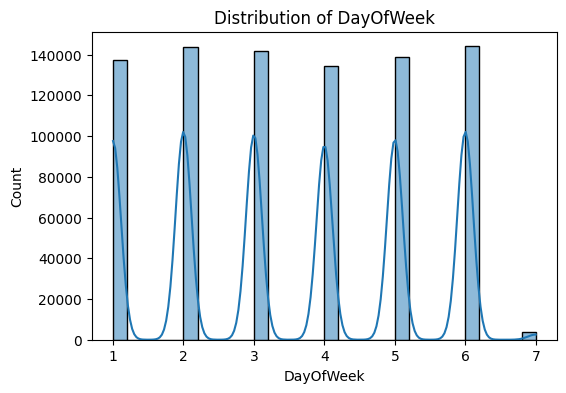

Mean of DayOfWeek: 3.5203613961288123
Median of DayOfWeek: 3.0
Standard deviation of DayOfWeek: 1.7236892212836188


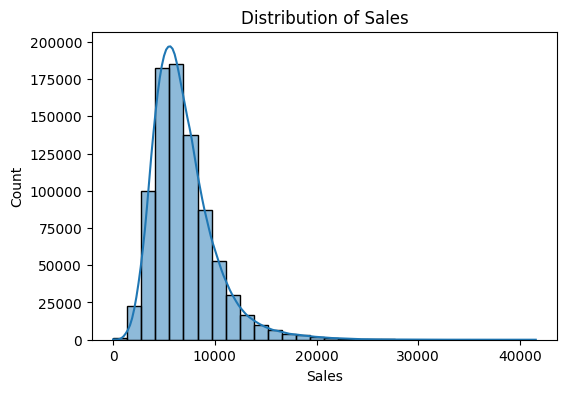

Mean of Sales: 6955.514290755952
Median of Sales: 6369.0
Standard deviation of Sales: 3104.214680428348


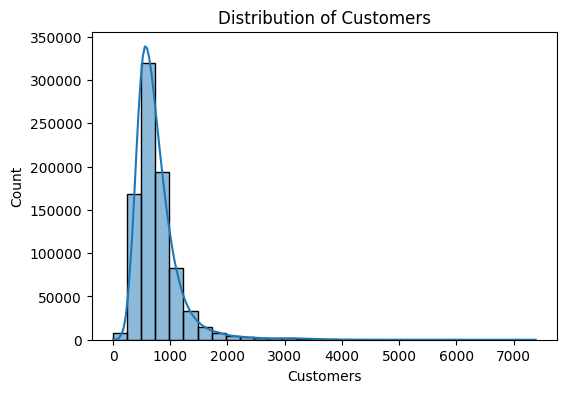

Mean of Customers: 762.7283951055907
Median of Customers: 676.0
Standard deviation of Customers: 401.2276743180318


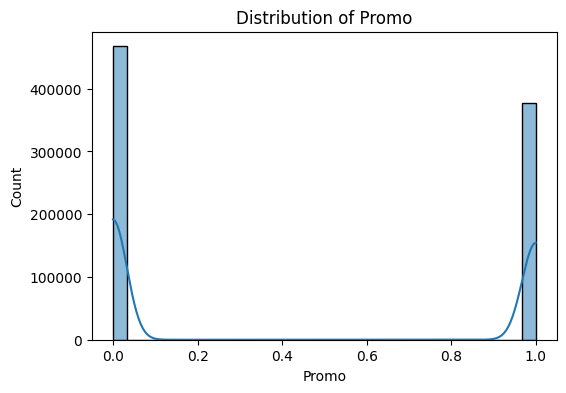

Mean of Promo: 0.44635193133047213
Median of Promo: 0.0
Standard deviation of Promo: 0.4971138475147211


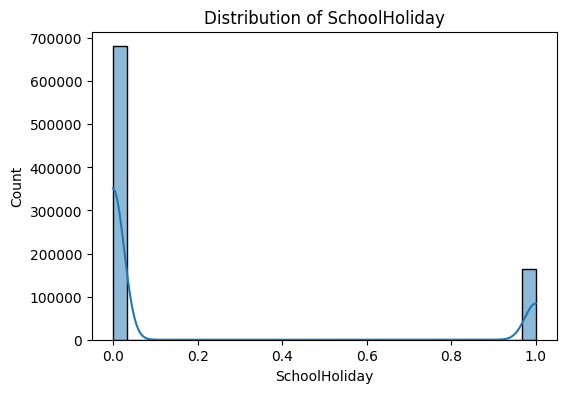

Mean of SchoolHoliday: 0.19357952230717487
Median of SchoolHoliday: 0.0
Standard deviation of SchoolHoliday: 0.3951033734671867


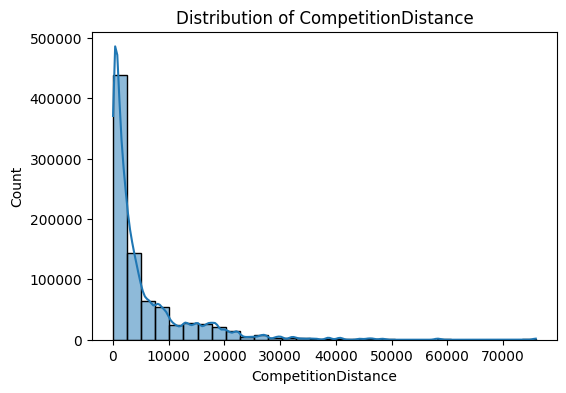

Mean of CompetitionDistance: 5457.979627312083
Median of CompetitionDistance: 2320.0
Standard deviation of CompetitionDistance: 7809.437311012042


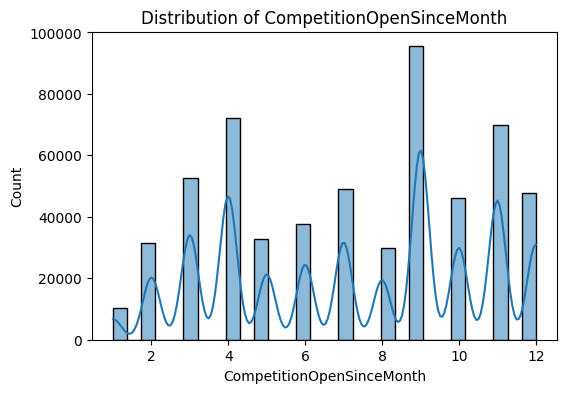

Mean of CompetitionOpenSinceMonth: 7.224878554569249
Median of CompetitionOpenSinceMonth: 8.0
Standard deviation of CompetitionOpenSinceMonth: 3.210143833035446


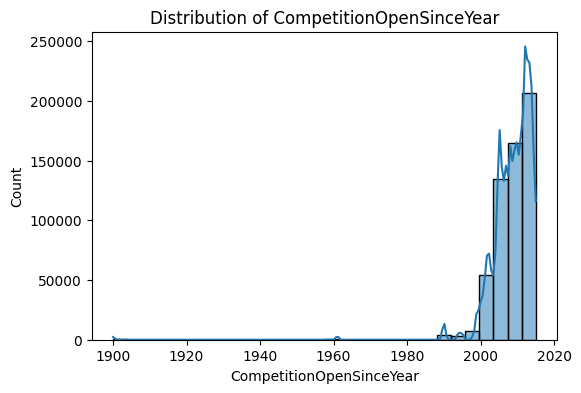

Mean of CompetitionOpenSinceYear: 2008.6977472024564
Median of CompetitionOpenSinceYear: 2010.0
Standard deviation of CompetitionOpenSinceYear: 5.978048138332688


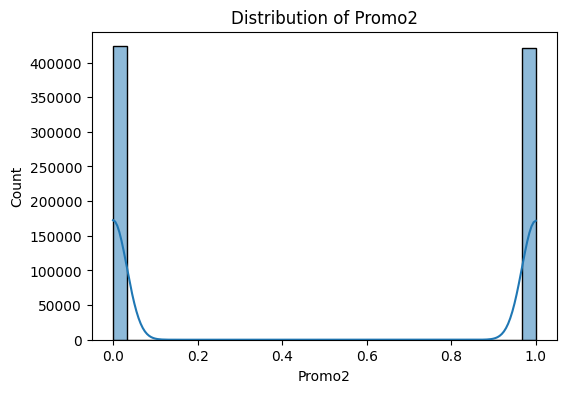

Mean of Promo2: 0.49868426039090846
Median of Promo2: 0.0
Standard deviation of Promo2: 0.4999985648965411


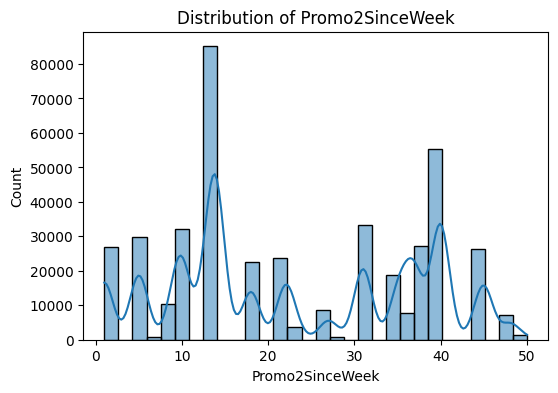

Mean of Promo2SinceWeek: 23.25342626785566
Median of Promo2SinceWeek: 22.0
Standard deviation of Promo2SinceWeek: 14.100568584277404


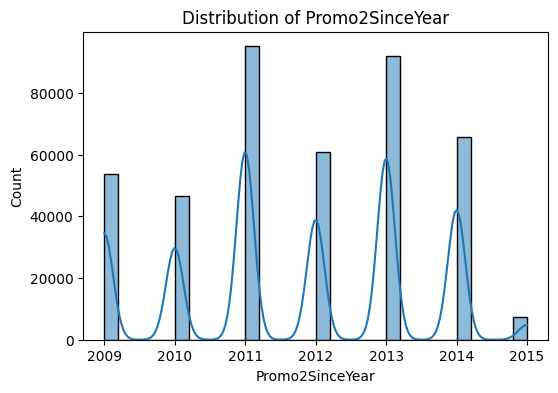

Mean of Promo2SinceYear: 2011.754018784806
Median of Promo2SinceYear: 2012.0
Standard deviation of Promo2SinceYear: 1.6609621263211622
Frequency counts of Date:
2015-07-31    1115
2013-11-06    1115
2013-11-18    1115
2013-11-17    1115
2013-11-16    1115
              ... 
2014-10-28     935
2014-10-27     935
2014-10-26     935
2014-10-25     935
2014-12-08     935
Name: Date, Length: 942, dtype: int64

Frequency counts of StateHoliday:
0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64



In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
df_temp = df_m2.copy()
# Numerical features
numerical_features = (df_temp.select_dtypes(include=['int64', 'float64']).columns)

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_temp[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

    # Central tendencies and dispersion
    mean = df_temp[feature].mean()
    median = df_temp[feature].median()
    std_dev = df_temp[feature].std()
    print(f'Mean of {feature}: {mean}')
    print(f'Median of {feature}: {median}')
    print(f'Standard deviation of {feature}: {std_dev}')

# Categorical features
categorical_features = df.select_dtypes(include=['object']).columns

for feature in categorical_features:
    print(f'Frequency counts of {feature}:')
    print(df[feature].value_counts())
    print()

#### Chart - 1 Histogram of sales

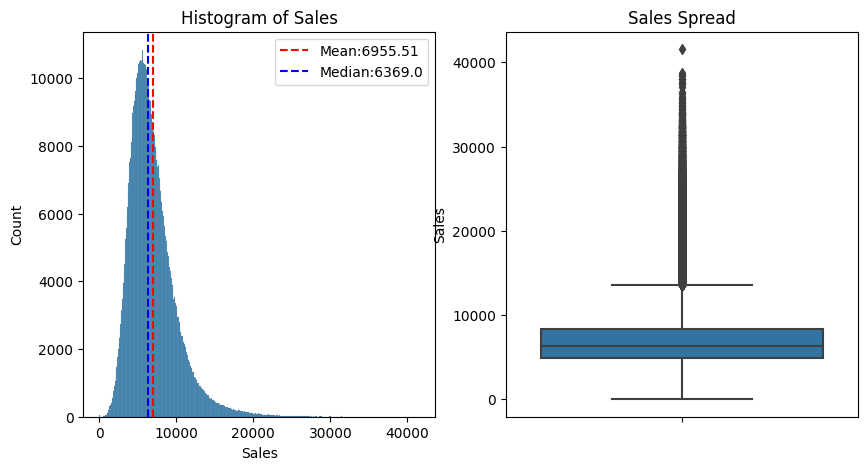

5th Percentile of Sales 3173.0
95th Percentile of Sales 12668.0


In [30]:
# Chart - 1 visualization code
plt.figure(figsize=(10,5))

#plt.subplot(1,2,1)
#plt.title('Histogram of Sales')
#sns.distplot(data['Sales'])

data = df_m2

plt.subplot(1,2,1)
plt.title('Histogram of Sales')
sns.histplot(data['Sales'])

# Calculate the mean and median
mean_value = data['Sales'].mean().round(2)
median_value = data['Sales'].median().round(2)

# Draw lines for mean and median
plt.axvline(mean_value, color='red', linestyle='--', label='Mean:'+str(mean_value))
plt.axvline(median_value, color='blue', linestyle='--', label='Median:'+str(median_value))
plt.legend()

plt.subplot(1,2,2)
plt.title('Sales Spread')
sns.boxplot(y = data['Sales'])
plt.show()

print('5th Percentile of Sales', data['Sales'].quantile(0.05))
print('95th Percentile of Sales', data['Sales'].quantile(0.95))

##### 1. Why did you pick the specific chart?

- A histogram allows us to see the distribution of data and understand its central tendency and the spread of the dataset
- A box plotprovides a summary of the distribution of a dataset, including information about the median, quartiles, and potential outliers.

##### 2. What is/are the insight(s) found from the chart?

- The distribution of sales seems to be skewed to the right.
- 90% of the time the sales per day are within the interval 3173 and 12668
- However the top 5% of the sales are within the interval 12668 and 41551

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### 4.1 Visualizing categorical data

- `StateHoliday`
- `StoreType`
- `Assortment`
- `PromoInterval`

#### Chart - 2 Categorical features vs Sales histogram/Box-Plot

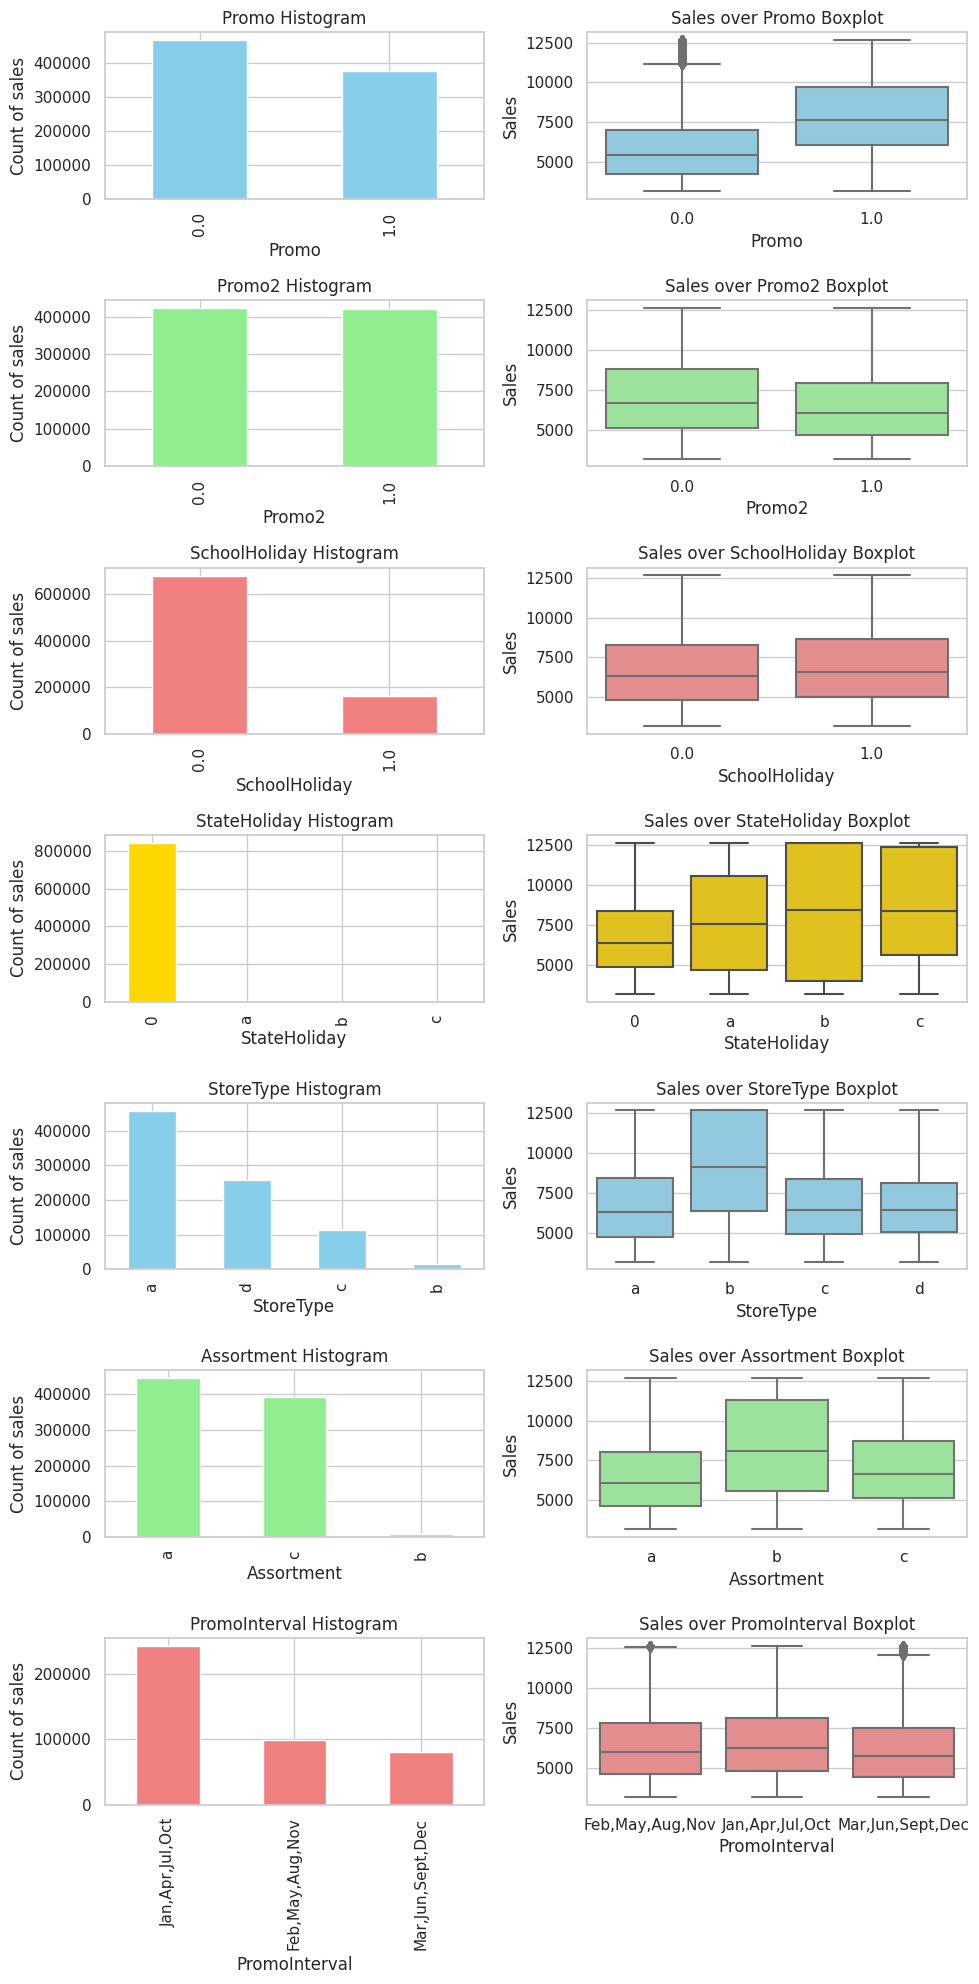

In [31]:
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 20))

input = cap_outliers(df_m2.copy())
columns = ['Promo','Promo2','SchoolHoliday','StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']
colors = ['skyblue','lightgreen','lightcoral','gold']

color_cycle = itertools.cycle(colors)

for i, col in enumerate(columns):
    color_name = next(color_cycle)
    plt.subplot(7, 2, 2*i+1)
    plt1 = input[col].value_counts().plot(kind='bar', color=color_name)
    plt.title(f'{col} Histogram')
    plt1.set(xlabel=col, ylabel='Count of sales')

    plt.subplot(7, 2, 2*i+2)
    sns.boxplot(x=col, y='Sales', data=input, color=color_name)
    plt.title(f'Sales over {col} Boxplot')
    plt.xlabel(col)
    plt.ylabel('Sales')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

- A histogram allows us to see the distribution of data and understand its central tendency and the spread of the dataset
- A box plotprovides a summary of the distribution of a dataset, including information about the median, quartiles, and potential outliers.

##### 2. What is/are the insight(s) found from the chart?

1. **Promotion (Promo):**

   - The count of sales and median value of sales is higher when there is a promotion compared to when there is no promotion.

2. **Promotion Type 2 (Promo2):**

   - The count and median value of sales is relatively similar for both Promo2 types.

3. **School Holiday:**

   - The median sales are slightly higher during school holidays.


4. **State Holiday:**

   - The median sales are highest during state holiday type 'a'.

5. **Store Type:**

   - The count of sales is highest for store type 'a'.
   - The median sales are highest for store type 'b'.

6. **Assortment:**

   - The count of sales is highest for assortment type 'a'.
   - The median sales are highest for assortment type 'c'.


7. **Promotion Interval (PromoInterval):**

   - The count of sales is highest for the promo interval 'Jan,Apr,Jul,Oct'.
   - The median sales are highest for the promo interval 'Feb,May,Aug,Nov'.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Understanding the impact of promotions, store types, assortments, and holiday periods on sales can help Rossmann optimize their strategies.
-Targeting promotions during high-sales periods, such as school holidays or specific state holidays, can lead to increased sales and better resource utilization.

In [32]:
df_temp['DayOfWeek'].sample(10)

Store
215     4
1081    7
296     1
268     5
137     1
934     1
911     5
873     1
854     3
756     2
Name: DayOfWeek, dtype: int64

#### Chart - 3 - Continuous features vs Sales - Scatterplot

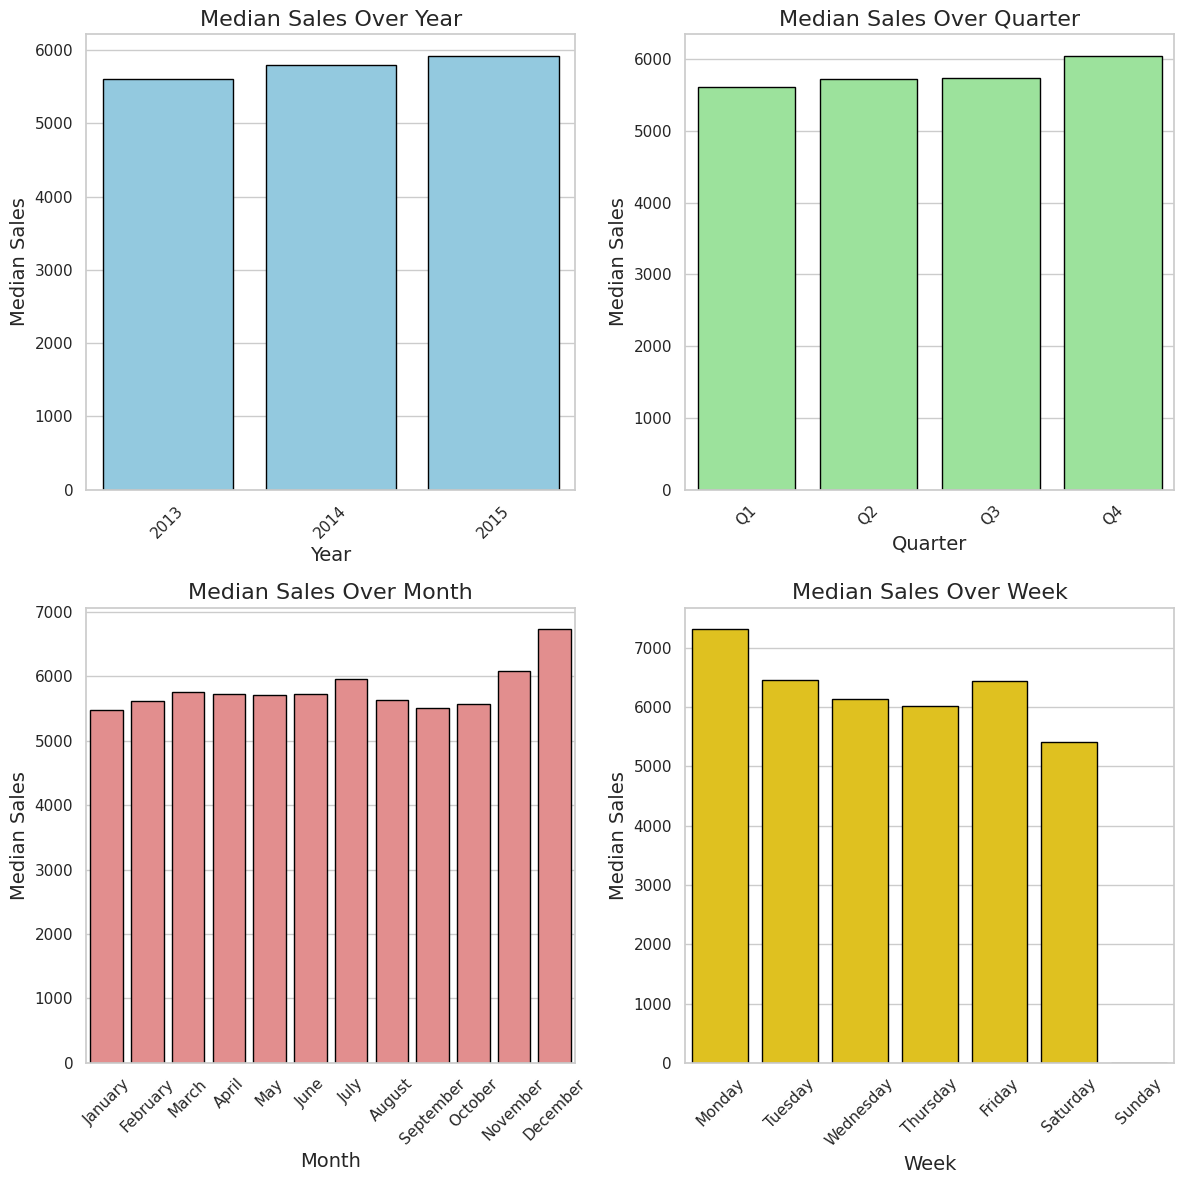

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Create a copy of the dataframe
df_temp = df_m.copy()
df_temp['Date'] = pd.to_datetime(df_temp['Date'])

# Extract year, month, week, and quarter from the Date
df_temp['year'] = df_temp['Date'].dt.year
df_temp['month'] = df_temp['Date'].dt.month_name()  # Get month names
df_temp['week'] = df_temp['Date'].dt.day_name()    # Get weekday names
df_temp['quarter'] = 'Q' + df_temp['Date'].dt.quarter.astype(str) # Get quarters

# Specify the correct order for months and weekdays
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'month' and 'week' columns to categorical type with specified order
df_temp['month'] = pd.Categorical(df_temp['month'], categories=month_order, ordered=True)
df_temp['week'] = pd.Categorical(df_temp['week'], categories=week_order, ordered=True)

# Set the seaborn style and color palette
sns.set_style("whitegrid")
colors = itertools.cycle(['skyblue', 'lightgreen', 'lightcoral', 'gold'])

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, col in enumerate(['year', 'quarter', 'month', 'week']):
    # Group by year, quarter, month, week and find the median of Sales
    sales_data = df_temp.groupby([col])['Sales'].median()

    # Plotting
    ax = axes[i // 2, i % 2]  # Select the appropriate subplot
    sns.barplot(x=sales_data.index, y=sales_data.values, color=next(colors), edgecolor='black', ax=ax)

    ax.set_title(f'Median Sales Over {col.capitalize()}', fontsize=16)
    ax.set_xlabel(f'{col.capitalize()}', fontsize=14)
    ax.set_ylabel('Median Sales', fontsize=14)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-labels for better visibility

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


##### 1. Why did you pick the specific chart?

A scatterplot helps us to visualize the relationship between two continuous variables. It consists of a grid where each point represents an observation , plotted along the horizontal and vertical axes corresponding to the two variables being analyzed.

##### 2. What is/are the insight(s) found from the chart?

1. **Competition Distance vs Sales:**

- The competition distance is negatively correlated with sales.

2. **Customers vs Sales:**

- The customers are positively correlated with sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Strategic decisions regarding store locations can be made based on competition distance to optimize sales and capture a larger market share.

#### Chart - 3 - Continuous features vs Sales - Scatterplot

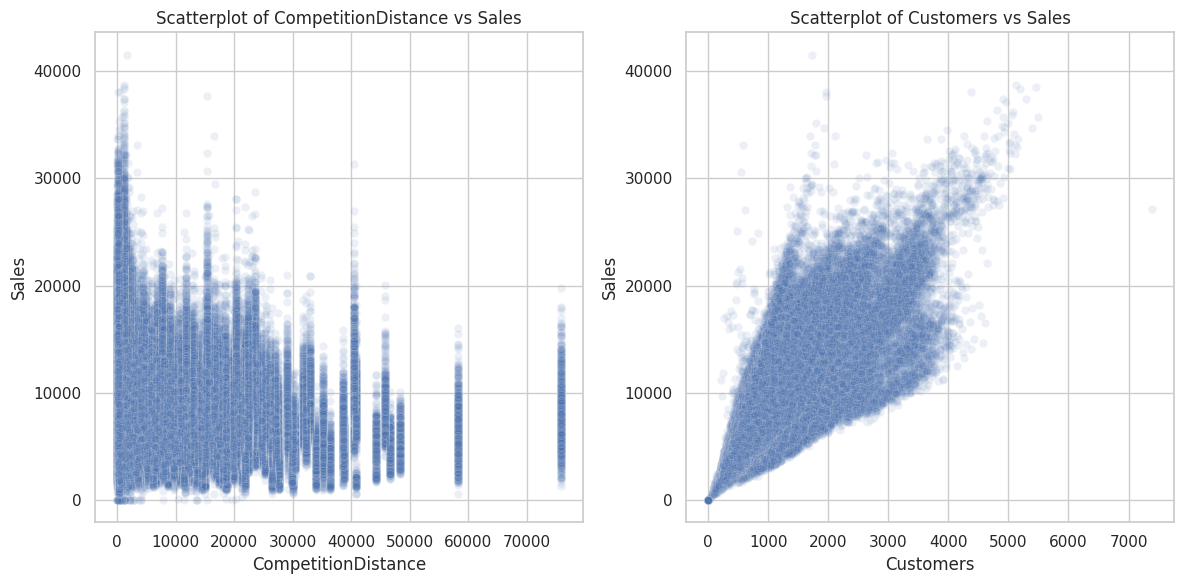

In [34]:
# Chart - 3 visualizing Numerical Columns
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your data stored in a DataFrame called 'df'
# 'Sales' is the dependent variable, and other numerical columns are independent variables

#numerical_columns = df_m2.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = [ 'CompetitionDistance','Customers']

# Calculate the number of rows and columns needed for the subplots
num_rows = (len(numerical_columns) // 2)
num_cols = 2

# Create subplots with 2 columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

# Flatten the axes array if necessary
axes = axes.flatten() if isinstance(axes, np.ndarray) else axes

# Iterate through each numerical column and create scatterplots in the subplots
for i, column in enumerate(numerical_columns):
    sns.scatterplot(x=column, y='Sales', data=df_m2, ax=axes[i], alpha=0.1, markers=['o'])
    axes[i].set_title(f'Scatterplot of {column} vs Sales')

# Remove any empty subplots if the number of variables is odd
if len(numerical_columns) % 2 != 0:
    axes[-1].remove()

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A scatterplot helps us to visualize the relationship between two continuous variables. It consists of a grid where each point represents an observation , plotted along the horizontal and vertical axes corresponding to the two variables being analyzed.

##### 2. What is/are the insight(s) found from the chart?

1. **Competition Distance vs Sales:**

- The competition distance is negatively correlated with sales.

2. **Customers vs Sales:**

- The customers are positively correlated with sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Strategic decisions regarding store locations can be made based on competition distance to optimize sales and capture a larger market share.

#### Chart - 4 Multiclass variables vs Sales

In [35]:
df_m2['DayOfWeek'].value_counts()

6    144058
2    143961
3    141936
5    138640
1    137560
4    134644
7      3593
Name: DayOfWeek, dtype: int64

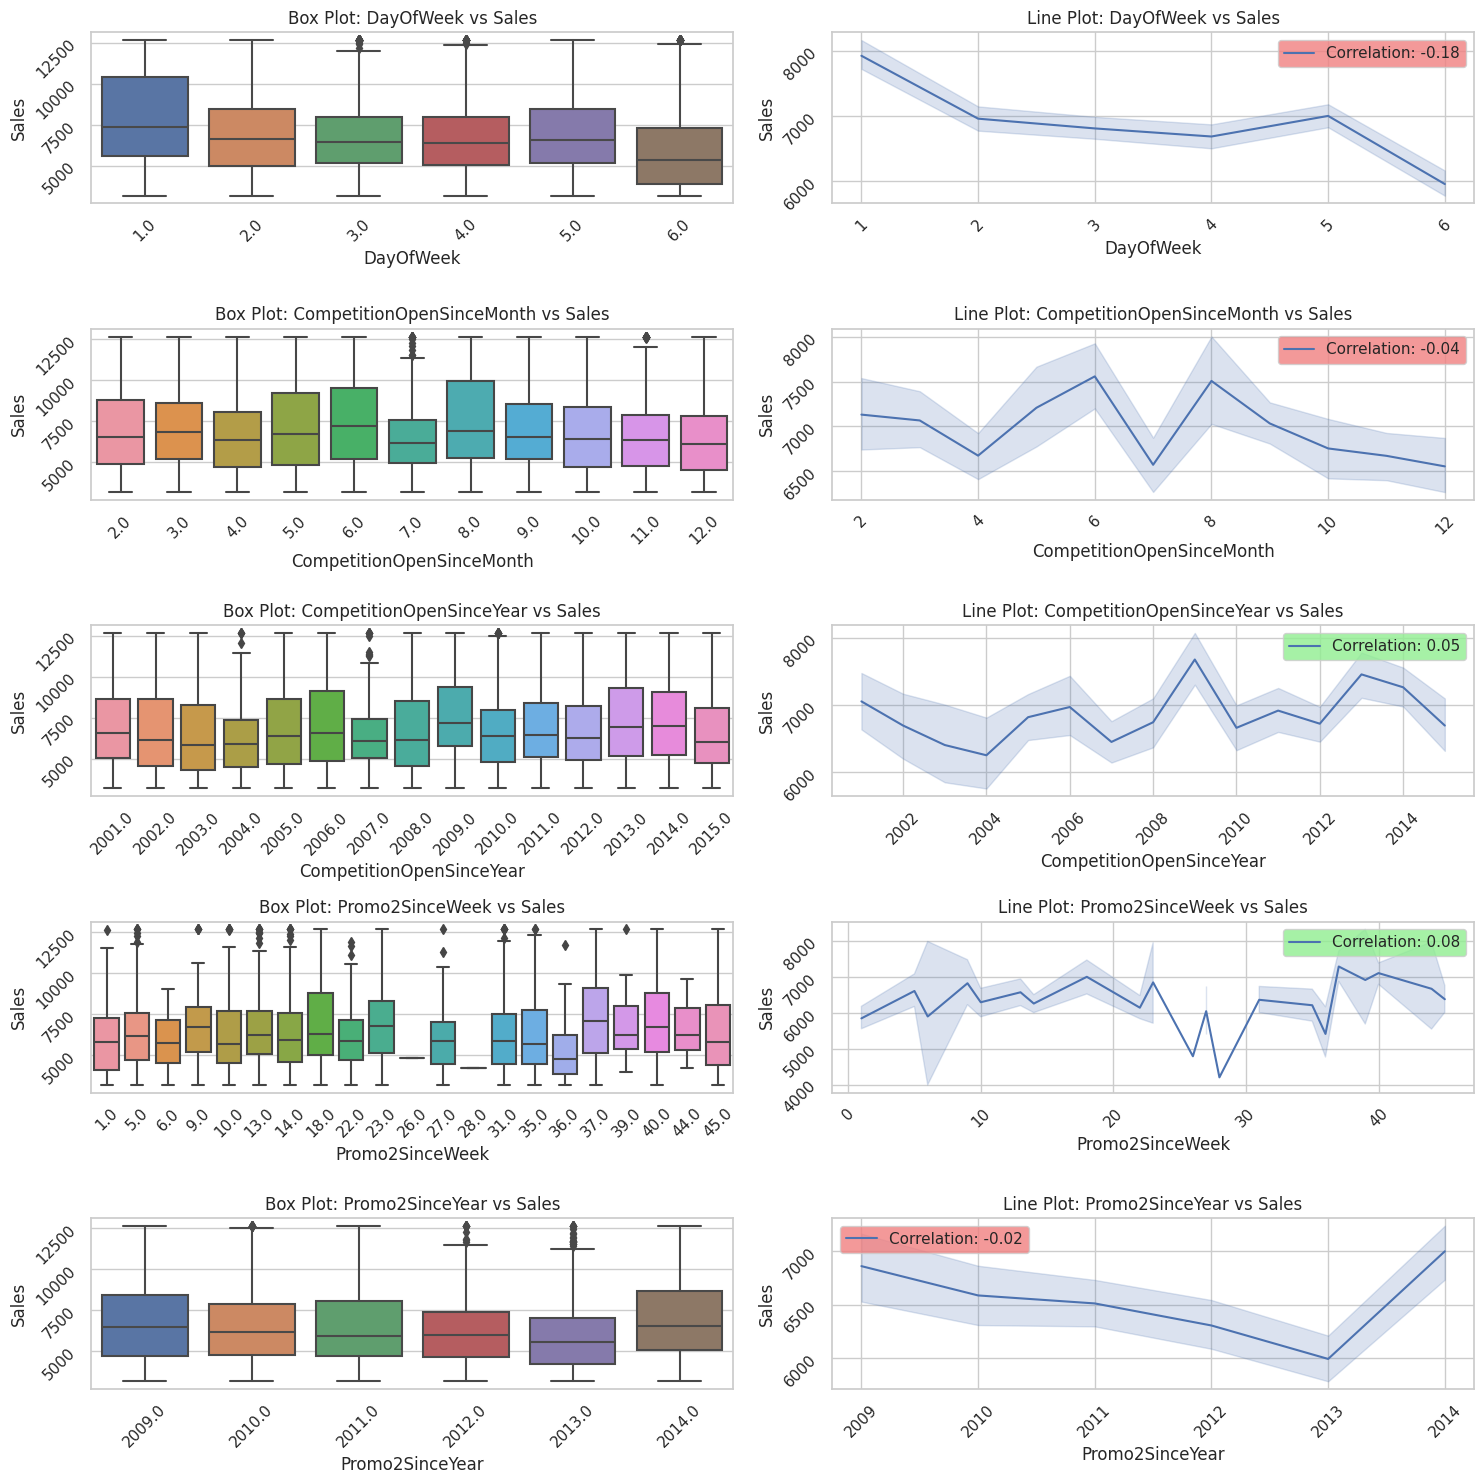

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

multiclass = ['DayOfWeek', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']
dataframe = cap_outliers(df_m2.reset_index(drop=True).copy())
target = 'Sales'

fig, axes = plt.subplots(len(multiclass), 2, figsize=(15, 15))
sns.set(style='whitegrid')

for i, feature in enumerate(multiclass):
    sample_data = dataframe.sample(n=int(len(dataframe)*0.005), random_state=42)

    sns.boxplot(x=feature, y=target, data=sample_data, ax=axes[i, 0])
    axes[i, 0].set_title(f'Box Plot: {feature} vs {target}')
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel(target)
    axes[i, 0].tick_params(rotation=45)

    sns.lineplot(x=feature, y=target, data=sample_data, ax=axes[i, 1])
    axes[i, 1].set_title(f'Line Plot: {feature} vs {target}')
    axes[i, 1].set_xlabel(feature)
    axes[i, 1].set_ylabel(target)
    axes[i, 1].tick_params(rotation=45)

    # Calculate correlation coefficient
    correlation = sample_data[feature].corr(sample_data[target])

    # Set color based on correlation sign
    color = 'lightgreen' if correlation >= 0 else 'lightcoral'

    # Add correlation value as a legend with color
    axes[i, 1].legend([f'Correlation: {correlation:.2f}'], facecolor=color)

plt.tight_layout()
plt.show()


In [37]:
import pandas as pd
import seaborn as sns

multiclass = ['DayOfWeek', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']
dataframe = cap_outliers(df_m2.reset_index(drop=True).copy())
target = 'Sales'

results = []

for feature in multiclass:
    sample_data = dataframe.sample(n=int(len(dataframe)*0.005), random_state=42)

    median = sample_data.groupby(feature)[target].median().reset_index()
    q1 = sample_data.groupby(feature)[target].quantile(0.25).reset_index()
    q3 = sample_data.groupby(feature)[target].quantile(0.75).reset_index()

    result = pd.merge(median, q1, on=feature)
    result = pd.merge(result, q3, on=feature)
    result.columns = [feature, 'Median', '25th Percentile', '75th Percentile']

    results.append(result)

# Print the dataframes
for result in results:
    print(result)


   DayOfWeek  Median  25th Percentile  75th Percentile
0        1.0  7381.0          5607.00         10440.00
1        2.0  6609.0          4957.25          8460.75
2        3.0  6459.5          5180.50          7969.25
3        4.0  6381.0          5037.00          7999.00
4        5.0  6561.0          5167.50          8467.50
5        6.0  5348.0          3872.00          7331.00
    CompetitionOpenSinceMonth  Median  25th Percentile  75th Percentile
0                         2.0  6520.0          4883.00          8786.00
1                         3.0  6852.0          5218.00          8632.00
2                         4.0  6372.5          4714.50          8049.25
3                         5.0  6726.5          4798.75          9242.50
4                         6.0  7230.0          5207.00          9510.50
5                         7.0  6183.5          4950.75          7559.50
6                         8.0  6876.0          5264.00          9950.00
7                         9.0  6528.0  

##### 1. Why did you pick the specific chart?

- A line plot, is a graphical representation of data points connected by straight lines. It is commonly used to show the relationship between two continuous variables or to display the change in a variable over time.

##### 2. What is/are the insight(s) found from the chart?

- There is a negative correlation between 'DayOfWeek' and 'Sales'.
- Competition since month has a slight negative correlation with sales.
- Promo2 since week has a slight positive correlation with sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [38]:
df_m2.columns

Index(['DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

#### Chart - 5 Sales Volume and Median Sales by Month

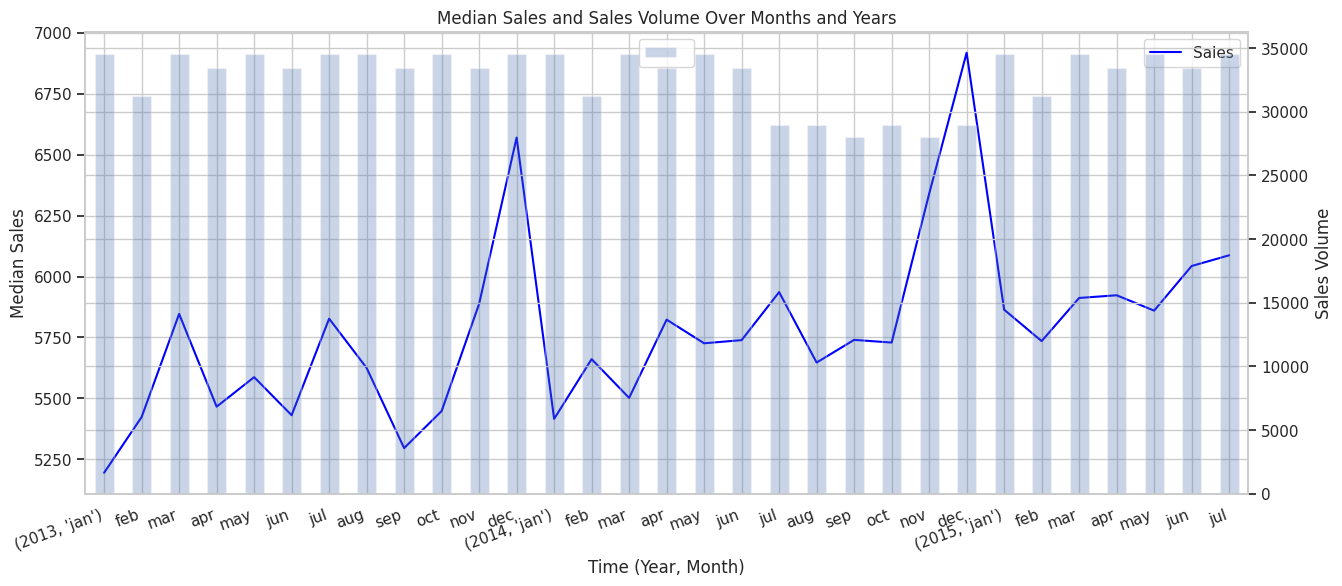

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a copy of the dataframe
df_temp = df_m.copy()

# Extract year and month from the Date
df_temp['year'] = pd.to_datetime(df_temp['Date']).dt.year
df_temp['month'] = pd.to_datetime(df_temp['Date']).dt.month

# Group by year, month and find the median of Sales
sales_data = df_temp.groupby(['year', 'month']).Sales.median()

# Find sales volume
sales_volume = df_temp.groupby(['year', 'month']).size()

fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot median sales as a line plot
sales_data.plot(kind='line', ax=ax1, color='blue', legend=True)

# Create another y-axis for sales volume
ax2 = ax1.twinx()
sales_volume.plot(kind='bar', ax=ax2, alpha=0.3, legend=True)

ax1.set_title('Median Sales and Sales Volume Over Months and Years')
ax1.set_xlabel('Time (Year, Month)')
ax1.set_ylabel('Median Sales')
ax2.set_ylabel('Sales Volume')

# Make new labels for x-axis where only the first occurrence of each year is labeled
labels = [(2013,'jan'),('feb'),('mar'),('apr'),('may'),('jun'),('jul'),('aug'),('sep'),('oct'),('nov'),('dec'),
          (2014,'jan'),('feb'),('mar'),('apr'),('may'),('jun'),('jul'),('aug'),('sep'),('oct'),('nov'),('dec'),
          (2015,'jan'),('feb'),('mar'),('apr'),('may'),('jun'),('jul')]



ax1.set_xticks(range(len(labels)))
ax2.set_xticks(range(len(labels))) # set xticks for ax2 as well

# Set labels for both axis after the plots are created
ax1.set_xticklabels(labels, rotation=20, ha='right')
ax2.set_xticklabels(labels, rotation=20, ha='right')

plt.show()


##### 1. Why did you pick the specific chart?

 A line plot helps us to visualize the relationship between two continuous variables or to display the change in a variable over time.

##### 2. What is/are the insight(s) found from the chart?

Seasonal Sales Trend: There seems to be a noticeable seasonal pattern in sales, with peaks occurring in December and lower points during the early months of the year. This suggests a possible relationship between sales and the holiday season.

Increasing Sales Volume: The sales volume, represented by the "Sales_Volume" data, shows a general increasing trend over time. This suggests that the number of sales transactions has been growing steadily.

Sales Fluctuations: While the sales volume exhibits a consistent upward trend, the actual sales figures show some fluctuations from month to month. These fluctuations may be influenced by various factors, such as promotions, external events, or changes in customer behavior.

Strong Sales in 2014: There is a noticeable increase in sales during 2014 compared to the preceding and subsequent years. This could indicate a period of significant growth or successful marketing initiatives during that year.

Correlation between Sales and Sales Volume: There appears to be a positive correlation between sales and sales volume, as the general trend of increasing sales volume aligns with the overall pattern of sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 This could indicate a period of significant growth or successful marketing initiatives during that year.

In [40]:
df_m2.columns

Index(['DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

#### Chart - 6

In [41]:
df_m.columns

Index(['DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

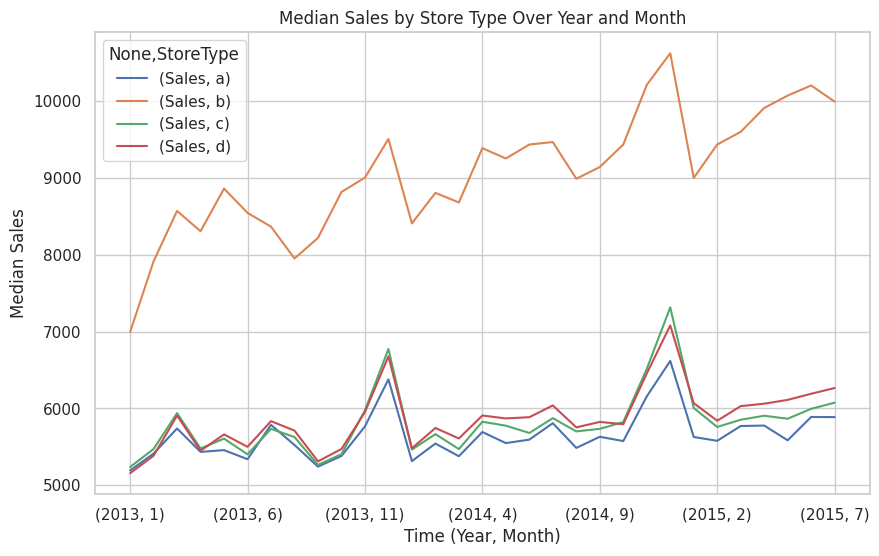

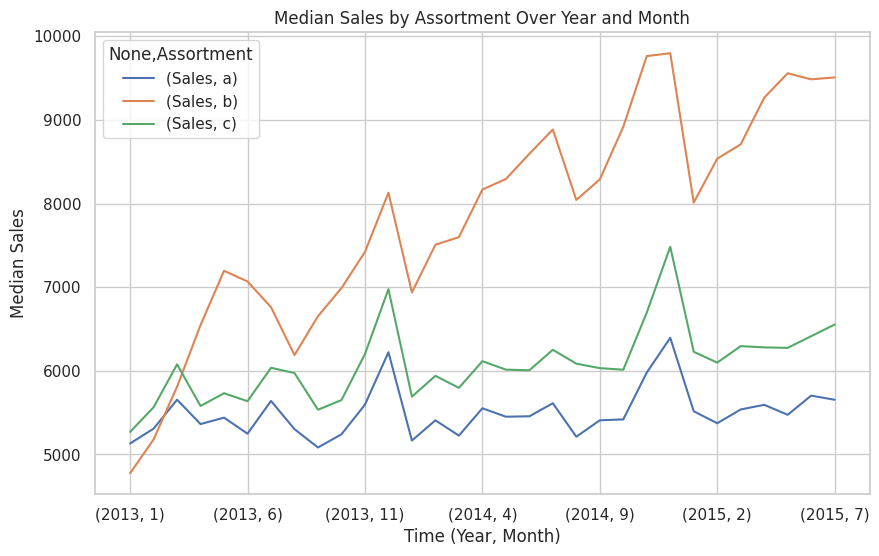

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a copy of the dataframe
df_temp = df_m.copy()

# Extract year and month from the Date
df_temp['year'] = pd.to_datetime(df_temp['Date']).dt.year
df_temp['month'] = pd.to_datetime(df_temp['Date']).dt.month

# Group by year, month and StoreType, then find the median of Sales
sales_data = df_temp[['Sales','StoreType','year', 'month']].groupby(['year', 'month','StoreType']).median()

# Reshape the data for plotting
sales_data = sales_data.unstack(level='StoreType')

# Plotting
sales_data.plot(figsize=(10, 6))

plt.title('Median Sales by Store Type Over Year and Month')
plt.xlabel('Time (Year, Month)')
plt.ylabel('Median Sales')
plt.show()

##--------------------------------------------------------------------------------------------------##

# Group by year, month and StoreType, then find the median of Sales
sales_data = df_temp[['Sales','Assortment','year', 'month']].groupby(['year', 'month','Assortment']).median()

# Reshape the data for plotting
sales_data = sales_data.unstack(level='Assortment')

# Plotting
sales_data.plot(figsize=(10, 6))

plt.title('Median Sales by Assortment Over Year and Month')
plt.xlabel('Time (Year, Month)')
plt.ylabel('Median Sales')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

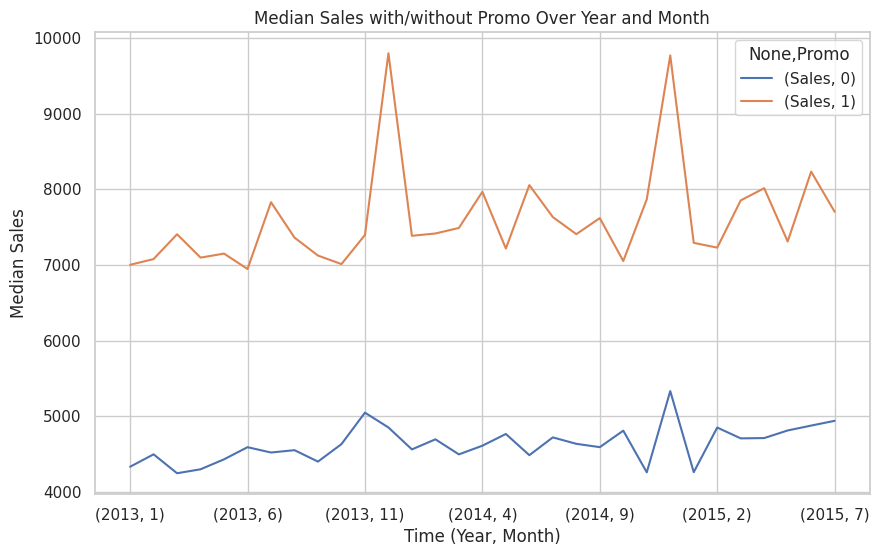

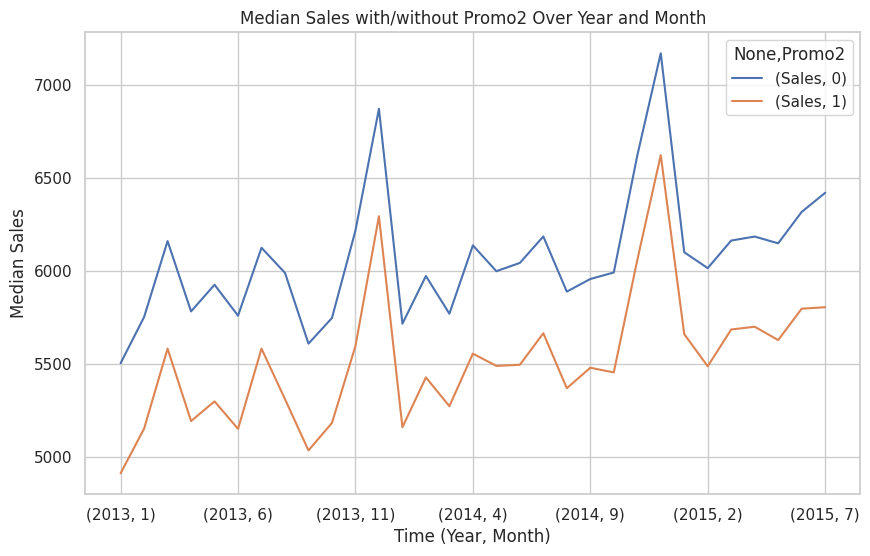

In [43]:
# Chart - 7 visualization code'Promo',

# Create a copy of the dataframe
df_temp = df_m.copy()

# Extract year and month from the Date
df_temp['year'] = pd.to_datetime(df_temp['Date']).dt.year
df_temp['month'] = pd.to_datetime(df_temp['Date']).dt.month

# Group by year, month and StoreType, then find the median of Sales
sales_data = df_temp[['Sales','Promo', 'month','year']].groupby(['year', 'month','Promo']).median()

# Reshape the data for plotting
sales_data = sales_data.unstack(level='Promo')

# Plotting
sales_data.plot(figsize=(10, 6))

plt.title('Median Sales with/without Promo Over Year and Month')
plt.xlabel('Time (Year, Month)')
plt.ylabel('Median Sales')
plt.show()

#---------------------------------------------------------------------------------------------#

# Group by year, month and StoreType, then find the median of Sales
sales_data = df_temp[['Sales','Promo2', 'month','year']].groupby(['year', 'month','Promo2']).median()

# Reshape the data for plotting
sales_data = sales_data.unstack(level='Promo2')

# Plotting
sales_data.plot(figsize=(10, 6))

plt.title('Median Sales with/without Promo2 Over Year and Month')
plt.xlabel('Time (Year, Month)')
plt.ylabel('Median Sales')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [44]:
# Chart - 8 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [45]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [46]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [47]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [48]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [49]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

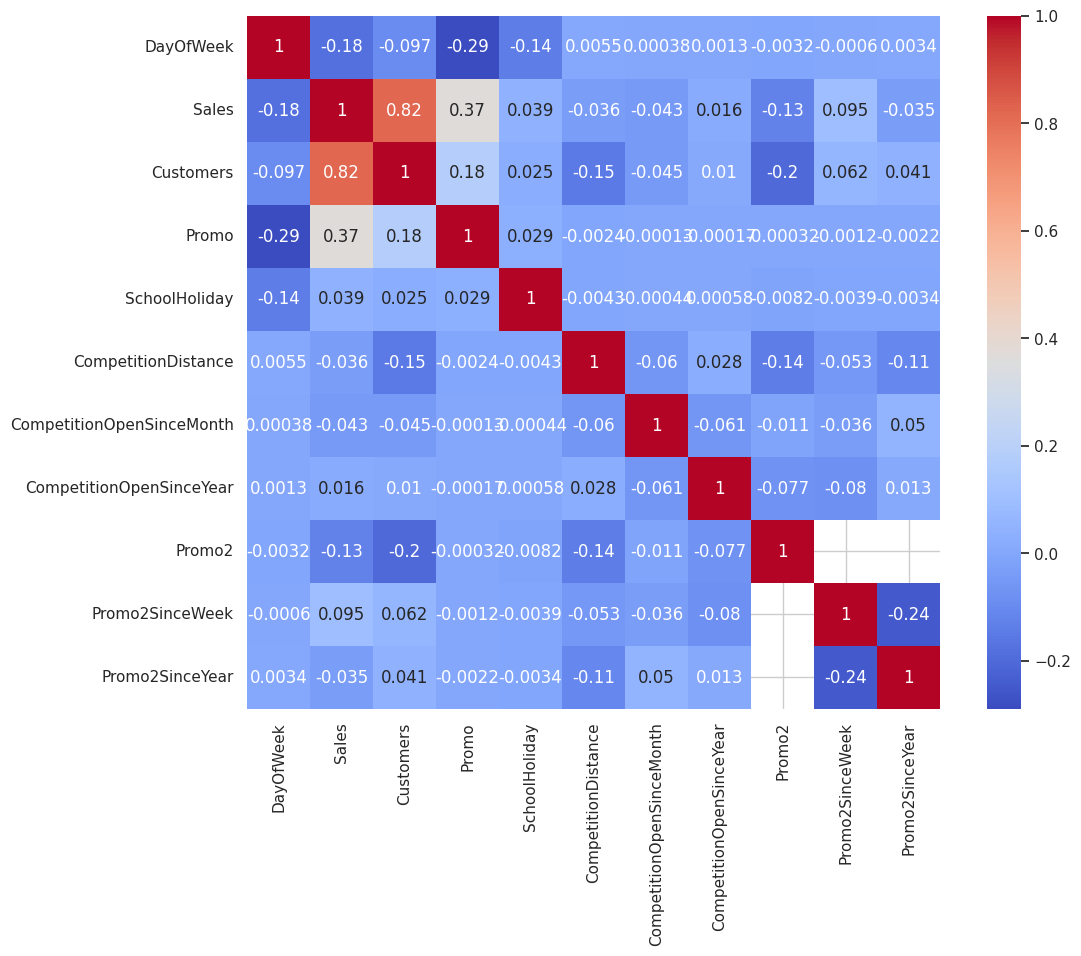

In [50]:
# Correlation Heatmap visualization code
# plot correlation matrix, specify image size
corr_matrix = df_m2.corr()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',square=True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [51]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1: The presence of a promotion (Promo) has a positive impact on sales

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis - H0: The presence of a promotion (Promo) has no significant impact on sales.
- Alternate Hypothesis - HA: The presence of a promotion (Promo) has an impact on sales.

#### 2. Perform an appropriate statistical test.

In [52]:
import scipy.stats as stats

# Seperate the data into two groups
promo_true = df_m2[df_m2['Promo'] == 1]
promo_false = df_m2[df_m2['Promo'] == 0]

# Perform Statistical Test to obtain P-Value
t_stat, p_value = stats.ttest_ind(promo_true['Sales'],promo_false['Sales'], axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)
print('t-stat:', t_stat)
print('p-value:', p_value)

# Compare p-value with significance level (0.05)
if p_value < 0.05:
    conclusion = "Reject null hypothesis. The presence of a promotion (Promo) has an impact on sales."
else:
    conclusion = "Fail to reject null hypothesis. The presence of a promotion (Promo) has no significant impact on sales."

print(conclusion)


t-stat: 363.8446754265649
p-value: 0.0
Reject null hypothesis. The presence of a promotion (Promo) has an impact on sales.


##### Which statistical test have you done to obtain P-Value?, Why did you choose the specific statistical test?

The independent t-test, also called the two sample t-test, independent-samples t-test or student's t-test, is an inferential statistical test that determines whether there is a statistically significant difference between the means in two unrelated groups. [_Reference_](https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php)



##### Insights from the Hypothesis Testing

- The t-statistic value (t=363.84) indicates the magnitude of the difference between the means of the two groups. A higher absolute value of the t-statistic indicates a larger difference between the means.

- The t-test results produced a very low p-value (P-Value=0.0), which means we can safely reject null hypothesis. This suggests there is a significant difference in sales between the days when there is a promotion (Promo = 1) and the days when there is no promotion (Promo = 0).



### Hypothetical Statement - 2: There is a significant difference in sales between different store types.

#### Hypothesis:

Null hypothesis (H0): There is no significant difference in sales between different store types.\
Alternative hypothesis (H1): There is a significant difference in sales between different store types.

#### 2. Perform an appropriate statistical test.

In [53]:
df_m2.columns

Index(['DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [54]:
df_m2['StoreType'].value_counts()

a    457077
d    258774
c    112978
b     15563
Name: StoreType, dtype: int64

In [55]:
# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(
  df_m2['Sales'][df_m2.StoreType =='a'],
  df_m2['Sales'][df_m2.StoreType =='b'],
  df_m2['Sales'][df_m2.StoreType =='c'],
  df_m2['Sales'][df_m2.StoreType =='d']
                                    )

print('f-statistic:', f_statistic)
print('p-value:', p_value)

# Compare p-value with significance level (0.05)
if p_value < 0.05:
    conclusion = "Reject null hypothesis. There is a significant difference in sales between different store types."
else:
    conclusion = "Fail to reject null hypothesis. There is no significant difference in sales between different store types."

print(conclusion)

f-statistic: 6081.815606141819
p-value: 0.0
Reject null hypothesis. There is a significant difference in sales between different store types.


##### Which statistical test have you done to obtain P-Value?, Why did you choose the specific statistical test?

ANOVA is a statistical test used to compare the means of two or more groups to determine if there are significant differences between them. In this case, the different store types are treated as the groups, and the sales data is compared to see if there are significant variations among the groups.\
By choosing the ANOVA test, we can compare the means of multiple store types simultaneously, rather than conducting pairwise comparisons between each pair of store types.

##### Insights from the Hypothesis Testing

The F-statistic (F = 6081) is a measure of the ratio of the variance between groups to the variance within groups. A higher F-statistic suggests a larger difference between the group means relative to the variability within each group.

A p-value below a certain threshold (commonly 0.05) indicates that the observed differences are unlikely to be due to random chance, hence in this case(p=0.0) we can reject the null hypothesis.

### Hypothetical Statement - 3: There is a significant difference in sales on different days of the week.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis:

Null hypothesis (H0): There is no significant difference in sales on different days of the week.\
Alternative hypothesis (H1): There is a significant difference in sales on different days of the week.

#### 2. Perform an appropriate statistical test.

In [56]:
# Perform Statistical Test to obtain P-Value
# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(
    df_m2[df_m2['DayOfWeek'] == 1]['Sales'],
    df_m2[df_m2['DayOfWeek'] == 2]['Sales'],
    df_m2[df_m2['DayOfWeek'] == 3]['Sales'],
    df_m2[df_m2['DayOfWeek'] == 4]['Sales'],
    df_m2[df_m2['DayOfWeek'] == 5]['Sales'],
    df_m2[df_m2['DayOfWeek'] == 6]['Sales'],
    df_m2[df_m2['DayOfWeek'] == 7]['Sales']
)

print('f-statistic:', f_statistic)
print('p-value:', p_value)
# Compare p-value with significance level (0.05)
if p_value < 0.05:
    conclusion = "Reject null hypothesis. There is a significant difference in sales on different days of the week."
else:
    conclusion = "Fail to reject null hypothesis. There is no significant difference in sales on different days of the week."

print(conclusion)

f-statistic: 7451.355360587356
p-value: 0.0
Reject null hypothesis. There is a significant difference in sales on different days of the week.


##### Insights from the Hypothesis Testing

 The large F-statistic suggests (F = 7451) a large difference between the group means relative to the variability within each group.

The p-value (p=0.0) indicates that the observed differences are unlikely to be due to random chance, hence in this case(p=0.0) we can reject the null hypothesis.
ie, there is a significant difference in sales on different days of the week.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

#### 1.1 First Let's identify the rows with missing values in the competition distance.

In [57]:
df_m2.shape

(844392, 16)

In [58]:
df_m2[np.isnan(df_m2['CompetitionDistance'])].isna().sum()

DayOfWeek                       0
Date                            0
Sales                           0
Customers                       0
Promo                           0
StateHoliday                    0
SchoolHoliday                   0
StoreType                       0
Assortment                      0
CompetitionDistance          2186
CompetitionOpenSinceMonth    2186
CompetitionOpenSinceYear     2186
Promo2                          0
Promo2SinceWeek              1564
Promo2SinceYear              1564
PromoInterval                1564
dtype: int64

- We can assume the rows with missing values in the competition distance have no competition. Hence we can fill the rows with competition details with a value outside the range (-1).

In [59]:
# Create a copy of the original DataFrame
df_c1 = df_m2.copy()

# Specify the columns to impute
columns_to_impute = ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']

# Identify the rows where CompetitionDistance is missing
condition = df_c1['CompetitionDistance'].isnull()

# Update the specified columns with -1 for the rows satisfying the condition
df_c1.loc[condition, columns_to_impute] = -1


#### 1.2 Lets impute the remaining missing values with either mode or median

In [60]:

columns_to_impute_median = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']
columns_to_impute_mode = ['PromoInterval']

df_c1_imputed = df_c1.copy()
for column in columns_to_impute_mode:
    df_c1_imputed[column].fillna(df_c1_imputed[column].mode()[0], inplace=True)


for column in columns_to_impute_median:
    df_c1_imputed[column].fillna(df_c1_imputed[column].median(), inplace=True)


In [61]:
df_c1_imputed.shape

(844392, 16)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [62]:
# Handling Outliers & Outlier treatments
def cap_outliers(df):
    # Create a copy of the DataFrame to avoid modifying the original data
    cleaned_df = df.copy()

    # Iterate over numerical columns
    for column in cleaned_df.select_dtypes(include=np.number):
        # Calculate the 99th percentile value
        upper_cap_value = cleaned_df[column].quantile(0.95)
        lower_cap_value = cleaned_df[column].quantile(0.05)

        # Cap outliers to the 99th percentile value
        cleaned_df[column] = np.where(cleaned_df[column] > upper_cap_value, upper_cap_value, cleaned_df[column])
        #cleaned_df[column] = np.where(cleaned_df[column] < lower_cap_value, lower_cap_value, cleaned_df[column])

    return cleaned_df
df_c1_capped = cap_outliers(df_c1_imputed)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

#### 1.1 Create new features from `Date` column

In [63]:
# Manipulate Features to minimize feature correlation and create new features
df_c1_capped['week_number'] = (df_c1_capped['Date']).dt.week
df_c1_capped['month'] = (df_c1_capped['Date']).dt.month
df_c1_capped['year'] = (df_c1_capped['Date']).dt.year
#df_c1_capped.drop(['Date','Customers'], axis=1, inplace=True)#,'Customers'

#### 1.2 Create new feature `IsPromoMonth`

In [64]:
# Detect whether promo ran in the current month
df_c1_capped['IsPromoMonth'] = df_c1_capped.apply(lambda row: 1 if row['Date'].strftime('%b') in row['PromoInterval'] else 0, axis=1)
df_c1_capped['IsPromoMonth'].sample(5)

Store
888    1
762    1
398    0
713    0
411    1
Name: IsPromoMonth, dtype: int64

#### 1.3 Create new features `Av_sales/Assorment/StoreType/Month` and `Av_customers/Assorment/StoreType/Month`

In [65]:
describe_1 = df_c1_capped.groupby(['StoreType','Assortment','month'])['Sales'].mean().reset_index()
describe_1.rename(columns={'Sales':'Av_sales/Assorment/StoreType/Month'}, inplace=True)
describe_1.sample(5)

,StoreType,Assortment,month,Av_sales/Assorment/StoreType/Month
105,c,c,10,6543.877482
16,a,b,5,NaN
110,d,a,3,6381.854391
30,a,c,7,7383.995680
15,a,b,4,NaN


In [66]:
describe_2 = df_c1_capped.groupby(['StoreType','Assortment','month'])['Customers'].mean().reset_index()
describe_2.rename(columns={'Customers':'Av_customers/Assorment/StoreType/Month'}, inplace=True)
describe_2.sample(5)

,StoreType,Assortment,month,Av_customers/Assorment/StoreType/Month
54,b,b,7,1383.028536
50,b,b,3,1349.687032
8,a,a,9,727.053609
126,d,b,7,NaN
105,c,c,10,756.253545


In [67]:
describe =describe_1.join(describe_2['Av_customers/Assorment/StoreType/Month'])
describe.dropna(inplace=True)
print(describe.shape)
describe.sample(5)

(108, 5)


,StoreType,Assortment,month,Av_sales/Assorment/StoreType/Month,Av_customers/Assorment/StoreType/Month
6,a,a,7,6386.992795,730.872567
25,a,c,2,6964.143793,790.151292
65,b,c,6,12652.644444,1440.000000
46,b,a,11,9583.847619,1252.504762
8,a,a,9,6087.886251,727.053609


In [68]:
df_c2_capped = df_c1_capped.merge(describe, on=['StoreType', 'Assortment', 'month'])
print(df_c2_capped.shape)
df_c2_capped.sample(5)

(844392, 22)


,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,week_number,month,year,IsPromoMonth,Av_sales/Assorment/StoreType/Month,Av_customers/Assorment/StoreType/Month
279183,2.0,2013-04-09,4738.0,412.0,1.0,0,0.0,a,a,20390.0,...,0.0,22.0,2012.0,"Jan,Apr,Jul,Oct",15,4,2013,1,6549.654691,758.873629
760542,2.0,2014-09-02,9359.0,1191.0,1.0,0,0.0,c,c,3890.0,...,0.0,22.0,2012.0,"Jan,Apr,Jul,Oct",36,9,2014,0,6443.106205,747.008369
274531,2.0,2013-04-23,8409.0,1040.0,1.0,0,0.0,a,a,1650.0,...,0.0,22.0,2012.0,"Jan,Apr,Jul,Oct",17,4,2013,1,6549.654691,758.873629
803311,1.0,2014-08-25,4023.0,324.0,0.0,0,1.0,d,c,4520.0,...,1.0,31.0,2013.0,"Jan,Apr,Jul,Oct",35,8,2014,0,6678.779764,607.796120
716248,4.0,2013-10-24,8033.0,734.0,1.0,0,0.0,a,c,16570.0,...,0.0,22.0,2012.0,"Jan,Apr,Jul,Oct",43,10,2013,1,6942.186228,797.842643


#### 1.4 Convert competition Distance to binned values

In [69]:
df_c2_capped['CompetitionDistanceBin'] = pd.cut(df_c2_capped['CompetitionDistance'], 6, labels=['1','2','3','4','5','6'])

#### 1.5 Create new feature `CompetitionOpenSinceDay`

In [70]:
'''
df_c3_capped = df_c2_capped[df_c2_capped['CompetitionOpenSinceYear']>0]
#df_c3_capped.dropna(inplace=True)
df_c3_capped['CompetitionOpenSinceDay'] = df_c3_capped['CompetitionOpenSinceYear'].apply(lambda x: str(x)[:4]) + '-'+ df_c3_capped['CompetitionOpenSinceMonth'].apply(lambda x: str(int(x)))+'-01'
df_c3_capped['CompetitionOpenSinceDay'] = (df_c3_capped['Date'] - pd.to_datetime(df_c3_capped['CompetitionOpenSinceDay'])).dt.days
df_c3_capped['CompetitionOpenSinceDay'].describe()'''

"\ndf_c3_capped = df_c2_capped[df_c2_capped['CompetitionOpenSinceYear']>0]\n#df_c3_capped.dropna(inplace=True)\ndf_c3_capped['CompetitionOpenSinceDay'] = df_c3_capped['CompetitionOpenSinceYear'].apply(lambda x: str(x)[:4]) + '-'+ df_c3_capped['CompetitionOpenSinceMonth'].apply(lambda x: str(int(x)))+'-01'\ndf_c3_capped['CompetitionOpenSinceDay'] = (df_c3_capped['Date'] - pd.to_datetime(df_c3_capped['CompetitionOpenSinceDay'])).dt.days\ndf_c3_capped['CompetitionOpenSinceDay'].describe()"

### 4. Categorical Encoding

In [71]:
# Encode your categorical columns
  # Separate features and target
cols_to_drop = ['Sales','Date']
target_col = ['Sales']
X = df_c2_capped.drop(cols_to_drop, axis=1)
y = df_c2_capped[target_col]

# Perform one-hot encoding for features
X_encoded = pd.get_dummies(X)


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 2. Feature Selection

In [72]:
# Select your features wisely to avoid overfitting
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

def calculate_vif(df):
    # Select numerical columns
    numerical_columns = df.select_dtypes(include=['float64', 'int64'])

    # Replace infinite values with NaN
    #numerical_columns.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Drop rows with NaN values
    #numerical_columns.dropna(inplace=True)

    # Remove duplicates
    #numerical_columns = numerical_columns.loc[:,~numerical_columns.columns.duplicated()]

    # Create a DataFrame to store VIF results
    vif_data = pd.DataFrame()
    vif_data['Variable'] = numerical_columns.columns
    vif_data['VIF'] = [vif(numerical_columns.values, i) for i in range(numerical_columns.shape[1])]

    return vif_data.sort_values(by='VIF', ascending=False)

calculate_vif(X_encoded.drop(['year','Promo2SinceYear','Av_sales/Assorment/StoreType/Month','Customers','CompetitionOpenSinceYear','month'], axis=1))

,Variable,VIF
9,Av_customers/Assorment/StoreType/Month,15.849533
4,CompetitionOpenSinceMonth,7.469185
6,Promo2SinceWeek,5.967525
0,DayOfWeek,5.292013
7,week_number,3.796799
5,Promo2,1.955807
1,Promo,1.896765
3,CompetitionDistance,1.650484
8,IsPromoMonth,1.569447
2,SchoolHoliday,1.285703


In [73]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 21 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   DayOfWeek                               844392 non-null  float64 
 1   Customers                               844392 non-null  float64 
 2   Promo                                   844392 non-null  float64 
 3   StateHoliday                            844392 non-null  category
 4   SchoolHoliday                           844392 non-null  float64 
 5   StoreType                               844392 non-null  category
 6   Assortment                              844392 non-null  category
 7   CompetitionDistance                     844392 non-null  float64 
 8   CompetitionOpenSinceMonth               844392 non-null  float64 
 9   CompetitionOpenSinceYear                844392 non-null  float64 
 10  Promo2                          

In [74]:
from sklearn.feature_selection import SelectKBest, f_classif


# Select top 10 features based on their ANOVA F-value
selector = SelectKBest(f_classif, k=25)
X = X_encoded.drop(['year','Promo2SinceYear','Av_sales/Assorment/StoreType/Month','Customers','CompetitionOpenSinceYear','month'], axis=1).copy()
y = y
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].to_list()

print('Selected features:')
print(selected_features)

Selected features:
['DayOfWeek', 'Promo', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'Promo2', 'Promo2SinceWeek', 'week_number', 'Av_customers/Assorment/StoreType/Month', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StoreType_a', 'StoreType_b', 'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c', 'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec', 'CompetitionDistanceBin_1', 'CompetitionDistanceBin_2', 'CompetitionDistanceBin_5', 'CompetitionDistanceBin_6']


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 6. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [75]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 7. Data Splitting

In [76]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Split the dataset into training and testing sets
#X = X_encoded.drop(['year','Promo2SinceYear','Av_sales/Assorment/StoreType/Month'
#                    ,'Customers','CompetitionOpenSinceYear','month'], axis=1).copy()


X = X_encoded[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### What data splitting ratio have you used and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [77]:
# Transform Your data
# Apply square root transformation to y_train and y_test
y_train_s = np.sqrt(y_train)
y_test_s = np.sqrt(y_test)

### 8. Data Scaling

In [78]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_s = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_s = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

##### Which method have you used to scale you data and why?

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [79]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Define models
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor(random_state=42)),
    ('Random Forest Regression', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting Regression', GradientBoostingRegressor(random_state=42)),
    ('XGBoost Regression', XGBRegressor(random_state=42))
]

X_train = X_train_s[:int(len(X_train_s))]
X_test = X_test_s[:int(len(X_test_s))]
y_train = y_train_s[:int(len(y_train_s))]
y_test = y_test_s[:int(len(y_test_s))]

# Train and evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'{name}:\n')
    print(model.get_params())
    print(f'    RMSE: {round(rmse,2)}')
    print(f'    MAE: {round(mae,2)}')
    print(f'    R-squared: {round(r2,2)}\n')

Linear Regression:

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
    RMSE: 13.65
    MAE: 10.95
    R-squared: 0.26

Decision Tree Regression:

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
    RMSE: 7.48
    MAE: 5.15
    R-squared: 0.78



KeyboardInterrupt: ignored

Linear Regression:

    RMSE: 13.61
    MAE: 10.94
    R-squared: 0.25

Decision Tree Regression:

    RMSE: 9.49
    MAE: 6.59
    R-squared: 0.64

Random Forest Regression:

    RMSE: 7.06
    MAE: 5.08
    R-squared: 0.8

Gradient Boosting Regression:

    RMSE: 12.39
    MAE: 9.9
    R-squared: 0.38

XGBoost Regression:

    RMSE: 7.21
    MAE: 5.47
    R-squared: 0.79


### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression


stats = {}

# Perform regression analysis
X = X_train_s
y = y_train_s
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

# Extract regression results
stats['Regression Results'] = results.summary().tables[1]
results.summary()

# Fit the Algorithm

# Predict on the model

In [ ]:
from sklearn.linear_model import LinearRegression


regressor = LinearRegression()
regressor.fit(X_train_s, y_train_s)

y_pred = regressor.predict(X_test_s)
R2_score = regressor.score(X_test_s, y_test_s)
print(R2_score)

In [ ]:
### Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters = {'alpha': [1e-5,1e-4,1e-3,1e-2,1e-1,1,5]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=3)
lasso_regressor.fit(X_train_s[:10000], y_train_s[:10000])

In [ ]:
print('Train set R2 score:', lasso_regressor.score(X_train_s, y_train_s))
print('Test set R2 score:', lasso_regressor.score(X_test_s, y_test_s))

In [ ]:
from sklearn.linear_model import Ridge


# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-5,1e-4,1e-3,1e-2,1,5]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=3)
ridge_regressor.fit(X_train_s[:10000],y_train_s[:10000])

In [ ]:
from sklearn.metrics import r2_score

print('Train set R2 score:', ridge_regressor.score(X_train_s, y_train_s))
print('Test set R2 score:', ridge_regressor.score(X_test_s, y_test_s))
R2_score = r2_score(y_test_s, ridge_regressor.predict(X_test_s))
print(R2_score)

In [ ]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train_s[:10000], y_train_s[:10000])

In [ ]:
print('Train set score:', elastic_regressor.score(X_train_s, y_train_s))
print('Test set score:', elastic_regressor.score(X_test_s, y_test_s))
R2_score = r2_score(y_test_s, elastic_regressor.predict(X_test_s))
print(R2_score)

### 1.2 Rndom Forest and Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Perform regression analysis
X = X_train_s
y = y_train_s
#regressor = DecisionTreeRegressor(criterion='friedman_mse', max_leaf_nodes=1000, random_state=0)
regressor = RandomForestRegressor(n_estimators=7,max_depth = 300, random_state=0)
regressor.fit(X, y)
y_pred = regressor.predict(X_test_s)

In [ ]:
print(regressor.score(X, y))
print(regressor.score(X_test_s, y_test_s))

DT - TRAIN 0.66 TEST -0.66  (criterion='friedman_mse', max_leaf_nodes=1000, random_state=0)\
RF - TRAIN 0.93 TEST -0.82 (n_estimators=10, random_state=0)

In [ ]:
pd.DataFrame(regressor.feature_importances_, X_train.columns, columns=['Coefficient']).sort_values('Coefficient', ascending=False)

In [ ]:
plt.scatter(y_pred,y_test_s)

In [ ]:
pd.to_csv

In [ ]:
### Heteroscadacity
#plt.scatter(y_pred,y_test_s-y_pred)
#plt.xlabel('Predicted sales')
#plt.ylabel('residuals')

### RF Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [30,60,120],  # Number of trees in the forest
    'max_depth': [15,30,60],    # Maximum depth of the trees
    'min_samples_split': [2,5,7]    # Minimum number of samples required to split an internal node
}

# Create the RandomForestRegressor
regressor = RandomForestRegressor(random_state=0)

# Create the GridSearchCV object
grid_search = RandomizedSearchCV(regressor, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_s, y_train_s)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Get the best model
best_model = grid_search.best_estimator_

# Use the best model to make predictions
y_pred = best_model.predict(X_test_s)


In [ ]:
print(regressor.score(X, y))
print(regressor.score(X_test_s, y_test_s))

### GBM AND XGBOOST

In [ ]:
#mport gradient boosting
from sklearn.ensemble import GradientBoostingRegressor

# Perform regression analysis
X = X_train_s
y = y_train_s

regressor = GradientBoostingRegressor()
regressor.fit(X, y)
y_pred = regressor.predict(X_test_s)

print(regressor.get_params())
print('Train R2 score:', regressor.score(X_train_s, y_train_s))
print('Test R2 score:', regressor.score(X_test_s, y_test_s))


In [ ]:
from xgboost import XGBRegressor

# Perform regression analysis
X = X_train_s
y = y_train_s

regressor = XGBRegressor()
regressor.fit(X, y)
y_pred = regressor.predict(X_test_s)

print(regressor.get_params())
print('Train R2 score:', regressor.score(X_train_s, y_train_s))
print('Test R2 score:', regressor.score(X_test_s, y_test_s))

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

# Create an XGBoost regressor object
regressor = XGBRegressor()

# Create a GridSearchCV object with the specified parameter grid
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='r2', verbose=1)

# Perform hyperparameter tuning
grid_search.fit(X_train_s[:10000], y_train_s[:10000])

# Print the best hyperparameters and score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Print scores and hyperparameters during each iteration
results = grid_search.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print("Score: ", mean_score)
    print("Hyperparameters: ", params)
    print("-----------------------")


In [ ]:
!pip install bayesian-optimization --quiet

In [ ]:
from xgboost import XGBRegressor
from bayes_opt import BayesianOptimization

# Define the objective function for Bayesian optimization
def xgb_cv(n_estimators, learning_rate, max_depth, min_child_weight, subsample, gamma):
    # Create an XGBoost regressor object
    regressor = XGBRegressor(
        n_estimators=int(n_estimators),
        learning_rate=learning_rate,
        max_depth=int(max_depth),
        min_child_weight=min_child_weight,
        subsample=subsample,
        gamma=gamma
    )

    # Perform cross-validation
    cv_result = cross_val_score(regressor, X_train_s[:10000], y_train_s[:10000], cv=5, scoring='r2').mean()

    return cv_result

# Define the parameter ranges for Bayesian optimization
param_ranges = {
    'n_estimators': (100, 500),
    'learning_rate': (0.01, 0.1),
    'max_depth': (3, 7),
    'min_child_weight': (1, 10),
    'subsample': (0.5, 1),
    'gamma': (0, 5)
}

# Create a BayesianOptimization object with the specified objective function and parameter ranges
bayes_opt = BayesianOptimization(xgb_cv, param_ranges)

# Perform hyperparameter tuning
bayes_opt.maximize(init_points=10, n_iter=50)

# Print the best hyperparameters and score
print("Best Hyperparameters: ", bayes_opt.max)
print("Best Score: ", bayes_opt.max['target'])


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [82]:
# Visualizing evaluation Metric Score chart
from sklearn.linear_model import LinearRegression

# Define models
models = [
    ('Linear Regression', LinearRegression())
         ]

X_train = X_train_s[:int(len(X_train_s))]
X_test = X_test_s[:int(len(X_test_s))]
y_train = y_train_s[:int(len(y_train_s))]
y_test = y_test_s[:int(len(y_test_s))]

# Train and evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    y_pred_test = model.predict(X_test)
    r2_test = r2_score(y_test, y_pred_test)

    print(f'{name}:\n')
    print(model.get_params())
    print(f'    RMSE: {round(rmse,2)}')
    print(f'    MAE: {round(mae,2)}')
    print(f'    R-squared: {round(r2,2)}\n')
    print(f'    R-squared test: {round(r2_test,2)}\n')

Linear Regression:

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
    RMSE: 13.65
    MAE: 10.95
    R-squared: 0.26

    R-squared test: 0.26



1. The performance of all the models are evaluated using three metrics: RMSE (Root Mean Square Error), MAE (Mean Absolute Error), and R-squared.

   - RMSE is a measure of how spread out the residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

   - MAE is a measure of how far off the predictions are from the actual outcomes on average.

   - R-squared (coefficient of determination) measures how well the model predicts the outcome variable. It represents the proportion of variance for a dependent variable that's explained by an independent variable or variables in a regression model. The value of R-squared ranges between 0 and 1 with 1 indicating a perfect fit.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

In [ ]:

X_train_s['label'] = y_train_s
X_test_s['label'] = y_test_s

In [ ]:
from autogluon.tabular import TabularPredictor
predictor = TabularPredictor(label ='label', problem_type="regression",eval_metric="r2").fit(X_train_s, presets="best_quality", time_limit=600)

In [ ]:
# With customers column
predictor.leaderboard(X_test_s, silent=True)

model	score_test	score_val	pred_time_test	pred_time_val	fit_time	pred_time_test_marginal	pred_time_val_marginal	fit_time_marginal	stack_level	can_infer	fit_order
0	WeightedEnsemble_L2

0.626180	0.624149	2.790824	9.337196	48.863949	0.004332	0.007426	2.882913	2	True	4

model	score_test	score_val	pred_time_test	pred_time_val	fit_time	pred_time_test_marginal	pred_time_val_marginal	fit_time_marginal	stack_level	can_infer	fit_order
0	WeightedEnsemble_L2	0.610029	0.607242	2.344490	13.735510	58.187510	0.004173	0.009010	3.967432	2	True	4

In [ ]:
predictor.leaderboard(X_test, silent=True)

In [ ]:
!pip install autogluon

In [ ]:
!unzip '/content/Colab Notebooks-20230614T070826Z-001.zip'

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install nbconvert

In [ ]:
import os
from nbconvert import PDFExporter

# Set the input directory where the notebooks are located
input_dir = "/content/Colab Notebooks"

# Set the output directory for the PDF files
output_dir = "/content/drive/MyDrive/pdf_files"

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Convert each notebook file to PDF
for file_name in os.listdir(input_dir):
    if file_name.endswith(".ipynb"):
        input_path = os.path.join(input_dir, file_name)
        output_path = os.path.join(output_dir, f"{os.path.splitext(file_name)[0]}.pdf")

        # Initialize the PDF exporter
        pdf_exporter = PDFExporter()

        # Convert the notebook to PDF
        with open(input_path) as nb_file:
            pdf_data, _ = pdf_exporter.from_file(nb_file)

        # Save the PDF to the output directory
        with open(output_path, "wb") as pdf_file:
            pdf_file.write(pdf_data)

        print(f"Converted {file_name} to PDF.")

print("PDF conversion completed.")


## APPENDIX

### Hypothetical Statement - 1 : The depedent variable (Sales) is normally distributed

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0: The depedent variable (Sales) is normally distributed.\
HA: The depedent variable (Sales) is not normally distributed.

In [ ]:
def drop_outliers(df):
    df_copy = df.copy()  # Create a copy of the DataFrame

    for column in df_copy.columns:
        if pd.api.types.is_numeric_dtype(df_copy[column]):
            lower_bound = df_copy[column].quantile(0.01)
            upper_bound = df_copy[column].quantile(0.99)
            df_copy = df_copy[(df_copy[column] >= lower_bound) & (df_copy[column] <= upper_bound)]

    return df_copy

df_c = cap_outliers(df_m2)
np.sqrt(df_c['Sales']).hist(bins=50)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Log-transform the 'Sales' data
log_sales = np.sqrt(df_c['Sales'])

# Adjust the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
ax = plt.hist(log_sales, bins=40, color='skyblue', alpha=0.7)
plt.xlabel('Log(Sales)')
plt.ylabel('Frequency')

# Calculate mean, median, and skewness
mean = log_sales.mean()
median = log_sales.median()
skew = log_sales.skew()
plt.axvline(mean, color='red')
plt.axvline(median, color='green')
plt.show()
print(mean, median, skew)


#### Transformation
<b>square-root for moderate skew:</b>
sqrt(x) for positively skewed data,
sqrt(max(x+1) - x) for negatively skewed data

<b>log for greater skew:</b>
log10(x) for positively skewed data,
log10(max(x+1) - x) for negatively skewed data

<b>inverse for severe skew:</b>
1/x for positively skewed data
1/(max(x+1) - x) for negatively skewed data

<b>Linearity and heteroscedasticity:</b>
First try log transformation in a situation where the dependent variable starts to increase more rapidly with increasing independent variable values
If your data does the opposite – dependent variable values decrease more rapidly with increasing independent variable values – you can first consider a square transformation.

#### 2. Perform an appropriate statistical test.

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Imputing Missing Values -sacked due to long running time

In [ ]:
#Since the missing values might be dependent on the remaining columns, instead of relying on measures of central tendency, we can use the KNNImputer algorithm to impute the missing values.

from sklearn.impute import KNNImputer
import pandas as pd

imputer = KNNImputer(n_neighbors=12)

df_c2 = imputer.fit_transform(df_c1.drop(['Date', 'StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], axis=1))

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables and drop the 'Date' column
df_imputed = pd.get_dummies(df_c1.copy().drop(['Date'], axis=1))

# Split the dataset into two parts: one with missing values and one without
missing_data = df_imputed[df_imputed['CompetitionOpenSinceMonth'].isnull()
    | df_imputed['CompetitionOpenSinceYear'].isnull() | df_imputed['Promo2SinceWeek'].isnull()
    | df_imputed['Promo2SinceYear'].isnull() | df_imputed['PromoInterval'].isnull()]

non_missing_data = df_imputed.dropna()

# Separate features and target variables for the non_missing_data
X = non_missing_data.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'], axis=1)
y_month = non_missing_data['CompetitionOpenSinceMonth']
y_year = non_missing_data['CompetitionOpenSinceYear']
y_promo2Week = non_missing_data['Promo2SinceWeek']
y_promo2Year = non_missing_data['Promo2SinceYear']
y_promoInterval = non_missing_data['PromoInterval']

# Train random forest models for each target variable
rf_month = RandomForestClassifier(n_estimators=10, random_state=0)
rf_month.fit(X, y_month)

rf_year = RandomForestClassifier(n_estimators=10, random_state=0)
rf_year.fit(X, y_year)

rf_Promo2Week = RandomForestClassifier(n_estimators=10, random_state=0)
rf_Promo2Week.fit(X, y_promo2Week)

rf_Promo2Year = RandomForestClassifier(n_estimators=10, random_state=0)
rf_Promo2Year.fit(X, y_promo2Year)

rf_PromoInterval = RandomForestClassifier(n_estimators=10, random_state=0)
rf_PromoInterval.fit(X, y_promoInterval)

# Impute missing values using the trained models
missing_data_X = missing_data.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'], axis=1)
missing_data['CompetitionOpenSinceMonth'] = rf_month.predict(missing_data_X)
missing_data['CompetitionOpenSinceYear'] = rf_year.predict(missing_data_X)
missing_data['Promo2SinceWeek'] = rf_Promo2Week.predict(missing_data_X)
missing_data['Promo2SinceYear'] = rf_Promo2Year.predict(missing_data_X)
missing_data['PromoInterval'] = rf_PromoInterval.predict(missing_data_X)

# Combine the two datasets back together
df_c1_imputed = pd.concat([non_missing_data, missing_data], axis=0)

# Reset the index
df_c2 = df_c1_imputed.reset_index(drop=True)


### Building base model

In [ ]:
X_train, X_test, y_train, y_test = pre_processing(df_m)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Build the decision tree classifier

classifier = DecisionTreeRegressor(criterion='entropy', max_leaf_nodes=15, random_state=0)
classifier.fit(X_train, y_train)


In [ ]:
y_predicted = classifier.predict(X_test)

In [ ]:
y_predicted[:10]

In [ ]:
y_test[:10]

In [ ]:
accuracy_score(y_test, y_predicted) * 100

In [ ]:
feature_importance = pd.DataFrame(zip(classifier.feature_names_in_, classifier.feature_importances_)).sort_values(by=1, ascending=False)
feature_importance[feature_importance[1] > 0]


In [ ]:
X_train, X_test, y_train, y_test = pre_processing(df_m)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Build a Random Forest Classifier
classifier = RandomForestRegressor(n_estimators=40, random_state=42, max_depth=10, max_leaf_nodes=10)

# TODO: Fix OUT OF MEMMORY
#classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
feature_importance = pd.DataFrame(zip(classifier.feature_names_in_, classifier.feature_importances_)).sort_values(by=1, ascending=False)
feature_importance[feature_importance[1] > 0]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

X_train, X_test, y_train, y_test = pre_processing2(df_m2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = np.sqrt(y_train)
y_test = np.sqrt(y_test)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)
R2_score = regressor.score(X_test, y_test)
print(R2_score)

In [ ]:
plt.scatter(y_pred,y_test)

In [ ]:
### Heteroscadacity
plt.scatter((y_pred),(y_test)-(y_pred))
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

In [ ]:
regressor = SGDRegressor()
regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)
R2_score = regressor.score(X_test, y_test)
print(R2_score)

In [ ]:
list(zip(y_pred, y_test))

In [ ]:
df_m.sample(5)

In [ ]:
df_m2.sample(5)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = pre_processing(df_m)
X_train2, X_test2, y_train2, y_test2 = pre_processing2(df_m2)
y_train2 = np.log1p(y_train2)
y_test2 = np.log1p(y_test2)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train2, y_train2)

y_pred = regressor.predict(X_test2)
R2_score = regressor.score(X_test2, y_test2)
print(R2_score)

In [ ]:
regressor.coef_

In [ ]:
plt.scatter(y_pred,y_test2)

In [ ]:
### Heteroscadacity
plt.scatter((y_pred),(y_test2)-(y_pred))
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

In [ ]:
pd.DataFrame(regressor.coef_,X_train2.columns).sort_values(by=0, ascending=False).plot(kind='barh')

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

y_train = y_test2
# Predict on the training data
y_train_pred = y_pred

# Calculate R2 score
r2 = r2_score(y_train, y_train_pred)
print("R2 Score:", r2)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_train_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Adjusted R2
n = X_train.shape[0]  # Number of samples
p = X_train.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R2 Score:", adjusted_r2)

# Calculate Mean Percentage Error (MPE)
mpe = np.mean((y_train - y_train_pred) / y_train) * 100
print("Mean Percentage Error (MPE):", mpe)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_train, y_train_pred) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)


In [ ]:
regressor.coef_,pd.DataFrame(X_train).columns

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train2, y_train2)

y_pred = regressor.predict(X_test2)
R2_score = regressor.score(X_test2, y_test2)
print(R2_score)

### Pre-Processing

In [ ]:
# Data pre-processing
def cap_outliers(df):
    # Create a copy of the DataFrame to avoid modifying the original data
    cleaned_df = df.copy()

    # Iterate over numerical columns
    for column in cleaned_df.select_dtypes(include=np.number):
        # Calculate the 99th percentile value
        cap_value = cleaned_df[column].quantile(0.95)

        # Cap outliers to the 99th percentile value
        cleaned_df[column] = np.where(cleaned_df[column] > cap_value, cap_value, cleaned_df[column])

    return cleaned_df

def pre_processing2(df_m):

  target_col = 'Sales'
  df_c = df_m.drop_duplicates()
  df_c = df_c.dropna()#.sample(n = 5000, random_state = 42)
  #df_c = df_c.sample(n = 5000, random_state = 42)

  # Generate  week_number, month and year columns from datetime
  df_c['week_number'] = (df_c['Date']).dt.week
  df_c['month'] = (df_c['Date']).dt.month
  df_c['year'] = (df_c['Date']).dt.year
  df_c.drop(['Date','Customers'], axis=1, inplace=True)#,'Customers'

  df_c = cap_outliers(df_c)


  # Separate features and target
  X = df_c.drop(target_col, axis=1)
  y = df_c[target_col]

  # Perform one-hot encoding for categorical features
  categorical_features = X.select_dtypes(include='category').columns.tolist()
  X_encoded = pd.get_dummies(X, columns=categorical_features)

  # Split the dataset into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test

In [ ]:
# Data pre-processing
def pre_processing(df_m):

  target_col = 'Sales'
  df_c = df_m.drop_duplicates()
  df_c = df_c.dropna()#.sample(n = 5000, random_state = 42)
  #df_c = df_c.sample(n = 5000, random_state = 42)

  if df['Date'].dtype == 'object':
    df_c['Date'] = pd.to_datetime(df_c['Date'])
  # Generate  week_number, month and year columns from datetime
  df_c['week_number'] = pd.to_datetime(df_c['Date']).dt.week
  df_c['month'] = pd.to_datetime(df_c['Date']).dt.month
  df_c['year'] = pd.to_datetime(df_c['Date']).dt.year
  df_c.drop(['Date','StateHoliday','Customers'], axis=1, inplace=True)#,'Customers'


  # Separate features and target
  X = df_c.drop(target_col, axis=1)
  y = df_c[target_col]

  # Perform one-hot encoding for categorical features
  categorical_features = X.select_dtypes(include='object').columns.tolist()
  X_encoded = pd.get_dummies(X, columns=categorical_features)

  # Split the dataset into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.33, random_state=42)
  return X_train, X_test, y_train, y_test